In [ ]:
Vicinamibacteraceae https://doi.org/10.1099/ijsem.0.002841
they are more abundant in homogeneous soil
There are two genera, aerobic, do not form spores, degrade cellobiose https://doi.org/10.1002/9781118960608.gbm01686 https://doi.org/10.1002/9781118960608.gbm01685
Cellobiose is important for stable redox potential because it is a reducing disacharide  DOI: 10.1128/AEM.00564-11
   
Also talk about: indirect effect of trophic interactions on microbial diversity,
Effect of mineral mobilization

In [ ]:
import qiime2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from os import path
from subprocess import PIPE,Popen
%matplotlib inline

In [111]:
!mkdir filtered_tables/16SrRNA filtered_tables/ITS1 

for marker in ['16SrRNA','ITS1']:
    
    inf = 'dada/%s/table.qza' % marker
    tempf = 'filtered_tables/%s/temp.qza' % marker
    outf = 'filtered_tables/%s/filtered_table.qza' % marker
    outf_da = 'filtered_tables/%s/filtered_table.D_VS_A.qza' % marker
    outf_hh = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    outf_hh_v = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qzv' % marker
    outf_hh_4 = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.l4.qza' % marker
    outf_hetro =  'filtered_tables/%s/filtered_table.hetero.qza' % marker
    outf_homo =  'filtered_tables/%s/filtered_table.homo.qza' % marker
    outf_shrub =  'filtered_tables/%s/filtered_table.shrub.qza' % marker
    outf_intershrub =  'filtered_tables/%s/filtered_table.intershrub.qza' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker
    metadata = '%s_metadata.tsv' % marker
    
    !qiime taxa filter-table \
      --i-table $inf \
      --i-taxonomy $taxonomy \
      --p-exclude mitochondria,chloroplast \
      --o-filtered-table $tempf
    
    !qiime feature-table filter-features \
      --i-table $tempf \
      --p-min-frequency 10 \
      --o-filtered-table $tempf
    
    !qiime feature-table filter-features \
      --i-table $tempf \
      --p-min-samples 2 \
      --o-filtered-table $outf
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [S] NOT IN ('AS3059','AS3009','AS3000','ITS-AS3027','ITS-AS3043')" \
      --o-filtered-table $outf_hh
    
    !qiime feature-table summarize \
      --i-table $outf_hh \
      --o-visualization $outf_hh_v \
      --m-sample-metadata-file $metadata
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='D_VS_L'" \
      --o-filtered-table $outf_da
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Geodiversity]='Heterogenous' AND [S] NOT IN ('AS3059','AS3009','AS3000','ITS-AS3027','ITS-AS3043')" \
      --o-filtered-table $outf_hetro
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Geodiversity]='Homogenous' AND [S] NOT IN ('AS3059','AS3009','AS3000','ITS-AS3027','ITS-AS3043')" \
      --o-filtered-table $outf_homo
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Niche]='Shrub' AND [S] NOT IN ('AS3059','AS3009','AS3000','ITS-AS3027','ITS-AS3043')" \
      --o-filtered-table $outf_shrub
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Niche]='Intershrub' AND [S] NOT IN ('AS3059','AS3009','AS3000','ITS-AS3027','ITS-AS3043')" \
      --o-filtered-table $outf_intershrub
    

    !qiime taxa collapse \
      --i-table $outf_hh \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table $outf_hh_4
    

mkdir: cannot create directory ‘filtered_tables/16SrRNA’: File exists
mkdir: cannot create directory ‘filtered_tables/ITS1’: File exists
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/temp.qza
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/temp.qza
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as p

In [112]:
narrow = pd.DataFrame(columns = ['marker','taxon','order','Geodiversity','niche','Relative Abundance'])

for marker in ['16SrRNA','ITS1']:
    
    outf_hh_4 = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.l4.qza' % marker
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    
    !qiime feature-table relative-frequency \
        --i-table $outf_hh_4 \
        --o-relative-frequency-table temp.qza
    
    a = qiime2.Artifact.load('temp.qza')
    table = a.view(pd.DataFrame).transpose()
    
    for taxon in table.index.tolist():
        for col in table:
            geo = 'Heterogeneous'
            if metadata.at[col,'Geodiversity'] == 'Homogenous':
                geo = 'Homogeneous'
            niche = metadata.at[col,'Niche']
            narrow.loc[len(narrow)] = [marker,taxon,taxon.split('__')[-1],geo,niche,table.at[taxon,col]]
    
    !rm temp.qza


/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[RelativeFrequency] to: temp.qza
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[RelativeFrequency] to: temp.qza


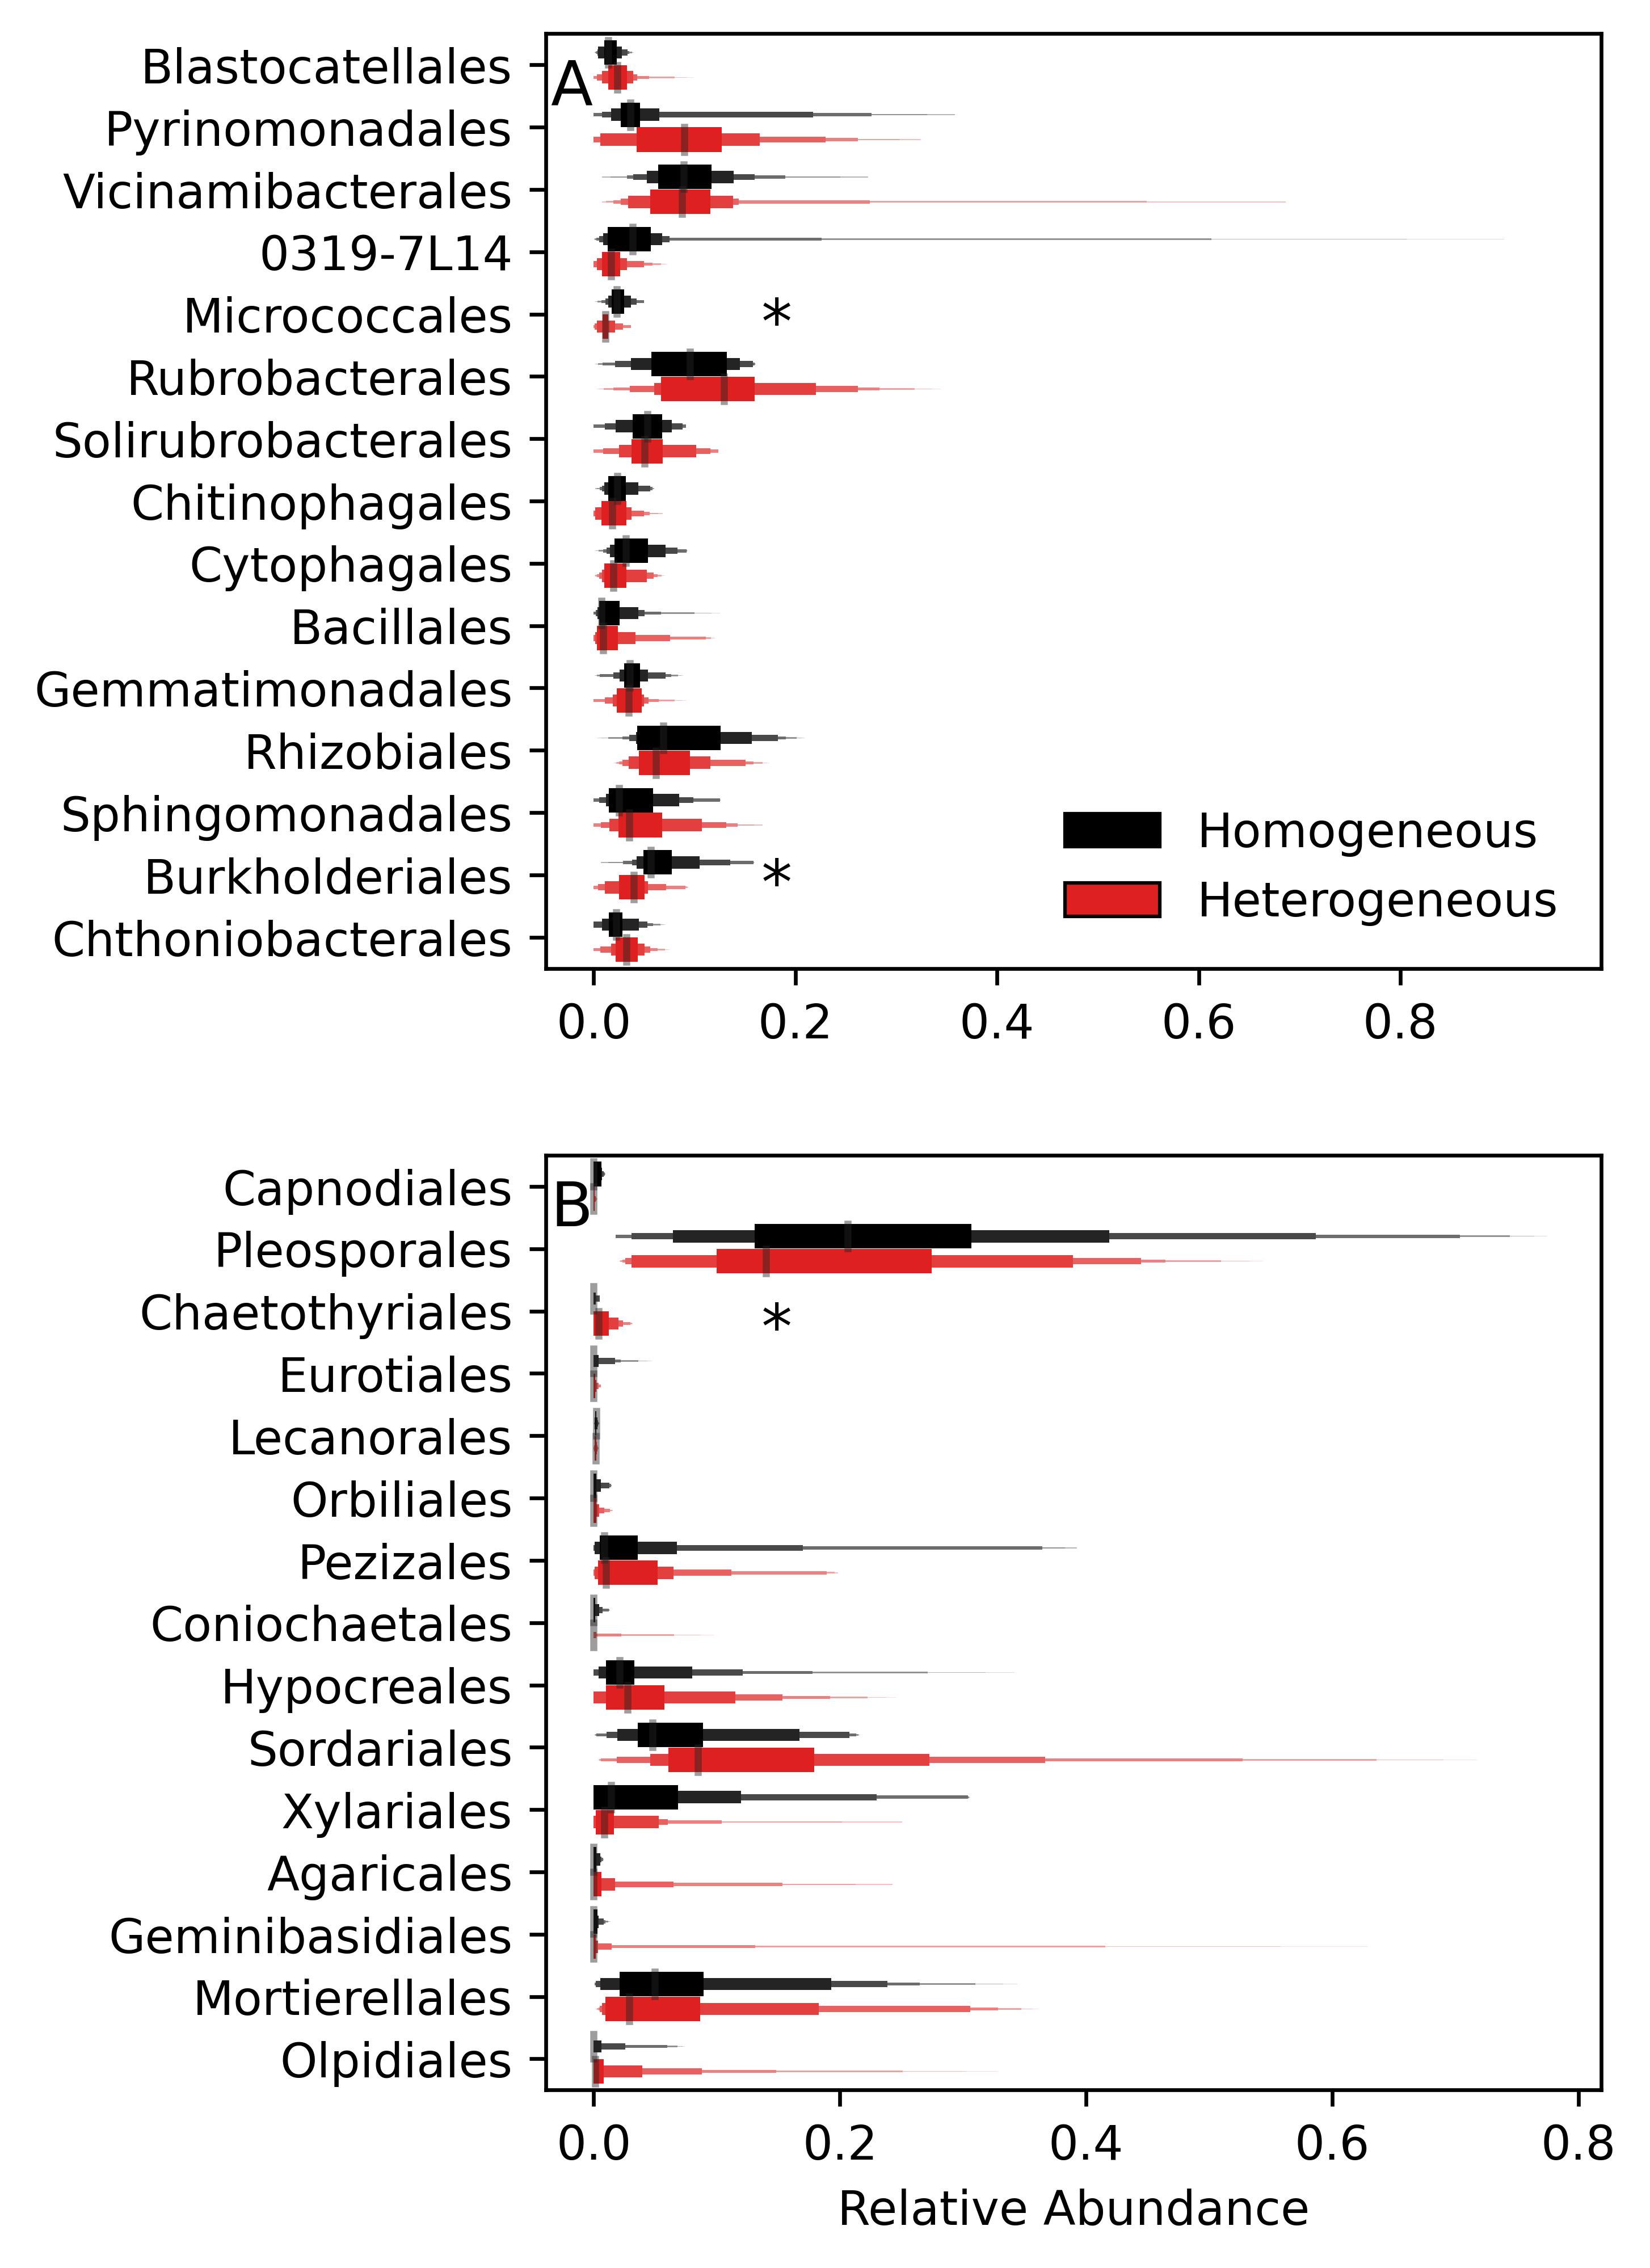

In [113]:
fig, axes = plt.subplots(nrows = 2, dpi=600, figsize=(4,8))
indices = [0,1]
ax_labels = ['A','B']

for marker in ['16SrRNA','ITS1']:
    
    averages = {}

    for order in set(narrow.loc[narrow.marker==marker].order):
        if 'NA' in order:
            continue
        averages[order] = np.average(narrow.loc[narrow.order==order]['Relative Abundance'])
        
        
    top_orders = [i[0] for i in sorted(averages.items(), key=lambda h: h[1], reverse=True)[:15]]
    
    ax = axes[indices.pop(0)]
    
    a = narrow.loc[narrow.order.isin(top_orders)]
    
    a.pivot_table(index=['order','Geodiversity']).to_csv('%s_top_orders.tsv' % marker,sep='\t')
    
    sns.boxenplot(x='Relative Abundance',y='order',data=a,hue='Geodiversity',ax=ax,palette=['black','red'],showfliers=False)

    if len(indices) == 0:
        ax.legend().remove()
    else:
        ax.set_xlabel('')
        
    ax.set_ylabel('')
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(1,-5),textcoords="offset points",ha="left",va="top",size=13)
    
    if marker == '16SrRNA':
        ax.legend(frameon=False,loc=4)
        ax.annotate('*',xy=(0.2,0.745),xycoords="axes fraction",xytext=(1,-5),textcoords="offset points",ha="left",va="top",size=13)
        ax.annotate('*',xy=(0.2,0.145),xycoords="axes fraction",xytext=(1,-5),textcoords="offset points",ha="left",va="top",size=13)
    else:
        ax.annotate('*',xy=(0.2,0.87),xycoords="axes fraction",xytext=(1,-5),textcoords="offset points",ha="left",va="top",size=13)
        
        
plt.savefig('rel_abund.png',bbox_inches='tight')

In [114]:
from scipy.stats import mannwhitneyu as mwu
from statsmodels.stats.multitest import multipletests

mw_results = pd.DataFrame(columns=['Order','u','p'])

for order in set(narrow.order):
    a = narrow.loc[((narrow.order == order) & (narrow.Geodiversity == 'Homogeneous'))]['Relative Abundance']
    b = narrow.loc[((narrow.order == order) & (narrow.Geodiversity == 'Heterogeneous'))]['Relative Abundance']
    mw_results.loc[len(mw_results)] = [order]+list(mwu(a,b))
mw_results['q'] = list(multipletests(mw_results.p,method='fdr_bh'))[1]   
mw_results.loc[mw_results.q<0.05]

Order      u         p         q
39   Burkholderiales  156.0  0.000096  0.005438
40     Micrococcales  131.0  0.000017  0.001411
103   Rhodothermales  266.0  0.001102  0.046848
146  Chaetothyriales  172.5  0.000014  0.001411

In [115]:
!mkdir -p bars_and_alpha_rarefaction/16SrRNA bars_and_alpha_rarefaction/ITS1 

for marker in ['16SrRNA','ITS1']:
    
    table = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker
    tree = 'dada/%s/rooted-tree.qza' % marker
    barplot = 'bars_and_alpha_rarefaction/%s/barplot.qza' % marker
    alpha_rarefaction_curve = 'bars_and_alpha_rarefaction/%s/alpha-rarefaction.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    
    !qiime taxa barplot \
      --i-table $table \
      --i-taxonomy $taxonomy \
      --m-metadata-file $metadata \
      --o-visualization $barplot
    
    !qiime diversity alpha-rarefaction \
      --i-table $table \
      --i-phylogeny $tree \
      --p-max-depth 6000 \
      --m-metadata-file $metadata \
      --o-visualization $alpha_rarefaction_curve

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: bars_and_alpha_rarefaction/16SrRNA/barplot.qza.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: bars_and_alpha_rarefaction/16SrRNA/alpha-rarefaction.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: bars_and_alpha_rarefaction/ITS1/barplot.qza.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/

In [116]:
!mkdir -p diversity

for marker in ['16SrRNA','ITS1']:
    
    depth = 3200
    if marker == 'ITS1':
        depth = 3000
    
    table = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    tree = 'dada/%s/rooted-tree.qza' % marker
    outdir = 'diversity/%s' % marker
    metadata = '%s_metadata.tsv' % marker
    rare_table = 'diversity/%s/rarefied_table.qza' % marker
    matrix_weighted = 'diversity/%s/weighted_unifrac_distance_matrix.qza' % marker
    matrix_unweighted = 'diversity/%s/unweighted_unifrac_distance_matrix.qza' % marker
    pcoa_weighted = 'diversity/%s/weighted_unifrac_pcoa_results.qza' % marker
    pcoa_unweighted = 'diversity/%s/unweighted_unifrac_pcoa_results.qza' % marker
    biplot_weighted = 'diversity/%s/weighted_unifrac_biplot_results.qza' % marker
    biplot_unweighted = 'diversity/%s/unweighted_unifrac_biplot_results.qza' % marker
    biplot_weighted_qzv = 'diversity/%s/weighted_unifrac_biplot_results.qzv' % marker
    biplot_unweighted_qzv = 'diversity/%s/unweighted_unifrac_biplot_results.qzv' % marker
    
    !qiime diversity core-metrics-phylogenetic \
      --i-phylogeny $tree \
      --i-table $table \
      --p-sampling-depth $depth \
      --m-metadata-file $metadata \
      --output-dir $outdir

    !qiime diversity pcoa \
      --i-distance-matrix $matrix_weighted \
      --p-number-of-dimensions 3 \
      --o-pcoa $pcoa_weighted

    !qiime diversity pcoa \
      --i-distance-matrix $matrix_unweighted \
      --p-number-of-dimensions 3 \
      --o-pcoa $pcoa_unweighted
    
    !qiime feature-table relative-frequency \
      --i-table $rare_table \
      --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $pcoa_weighted \
      --i-features temp.qza \
      --o-biplot $biplot_weighted
    
    !qiime diversity pcoa-biplot \
      --i-pcoa $pcoa_unweighted \
      --i-features temp.qza \
      --o-biplot $biplot_unweighted

    !qiime emperor biplot \
      --m-sample-metadata-file $metadata \
      --i-biplot $biplot_unweighted \
      --p-number-of-features 6 \
      --o-visualization $biplot_unweighted_qzv

    !qiime emperor biplot \
      --m-sample-metadata-file $metadata \
      --i-biplot $biplot_weighted \
      --p-number-of-features 6 \
      --o-visualization $biplot_weighted_qzv

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[Frequency] to: diversity/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: diversity/16SrRNA/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/16SrRNA/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: diversity/16SrRNA/unweighted_unifrac_pcoa_resul

In [117]:
for marker in ['16SrRNA','ITS1']:
    
    for niche in ['shrub','intershrub']:
        
        d = 'diversity_%s' % niche
        !mkdir -p $d
    
        depth = 3200
        if marker == 'ITS1':
            depth = 3000

        table = 'filtered_tables/%s/filtered_table.%s.qza' % (marker,niche)
        tree = 'dada/%s/rooted-tree.qza' % marker
        outdir = 'diversity_%s/%s' % (niche,marker)
        metadata = '%s_metadata.tsv' % marker
        rare_table = 'diversity_%s/%s/rarefied_table.qza' % (niche,marker)
        pcoa_weighted = 'diversity_%s/%s/weighted_unifrac_pcoa_results.qza' % (niche,marker)
        pcoa_unweighted = 'diversity_%s/%s/unweighted_unifrac_pcoa_results.qza' % (niche,marker)
        biplot_weighted = 'diversity_%s/%s/weighted_unifrac_biplot_results.qza' % (niche,marker)
        biplot_unweighted = 'diversity_%s/%s/unweighted_unifrac_biplot_results.qza' % (niche,marker)

        !qiime diversity core-metrics-phylogenetic \
          --i-phylogeny $tree \
          --i-table $table \
          --p-sampling-depth $depth \
          --m-metadata-file $metadata \
          --output-dir $outdir

        !qiime feature-table relative-frequency \
          --i-table $rare_table \
          --o-relative-frequency-table temp.qza 

        !qiime diversity pcoa-biplot \
          --i-pcoa $pcoa_weighted \
          --i-features temp.qza \
          --o-biplot $biplot_weighted

        !qiime diversity pcoa-biplot \
          --i-pcoa $pcoa_unweighted \
          --i-features temp.qza \
          --o-biplot $biplot_unweighted

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[Frequency] to: diversity_shrub/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: diversity_shrub/16SrRNA/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity_shrub/16SrRNA/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity_shrub/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity_shrub/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResul

In [82]:
for marker in ['16SrRNA','ITS1']:
    
    for niche in ['homo','hetero']:
        
        d = 'diversity_%s' % niche
        !mkdir -p $d
    
        depth = 3200
        if marker == 'ITS1':
            depth = 3000

        table = 'filtered_tables/%s/filtered_table.%s.qza' % (marker,niche)
        tree = 'dada/%s/rooted-tree.qza' % marker
        outdir = 'diversity_%s/%s' % (niche,marker)
        metadata = '%s_metadata.tsv' % marker
        rare_table = 'diversity_%s/%s/rarefied_table.qza' % (niche,marker)
        pcoa_weighted = 'diversity_%s/%s/weighted_unifrac_pcoa_results.qza' % (niche,marker)
        pcoa_unweighted = 'diversity_%s/%s/unweighted_unifrac_pcoa_results.qza' % (niche,marker)
        biplot_weighted = 'diversity_%s/%s/weighted_unifrac_biplot_results.qza' % (niche,marker)
        biplot_unweighted = 'diversity_%s/%s/unweighted_unifrac_biplot_results.qza' % (niche,marker)

        !qiime diversity core-metrics-phylogenetic \
          --i-phylogeny $tree \
          --i-table $table \
          --p-sampling-depth $depth \
          --m-metadata-file $metadata \
          --output-dir $outdir

        !qiime feature-table relative-frequency \
          --i-table $rare_table \
          --o-relative-frequency-table temp.qza 

        !qiime diversity pcoa-biplot \
          --i-pcoa $pcoa_weighted \
          --i-features temp.qza \
          --o-biplot $biplot_weighted

        !qiime diversity pcoa-biplot \
          --i-pcoa $pcoa_unweighted \
          --i-features temp.qza \
          --o-biplot $biplot_unweighted

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved FeatureTable[Frequency] to: diversity_homo/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: diversity_homo/16SrRNA/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_homo/16SrRNA/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_homo/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_homo/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: diversity_homo/16SrRNA/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity_homo/16SrRNA/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity_homo/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity_homo/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: di

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifyi

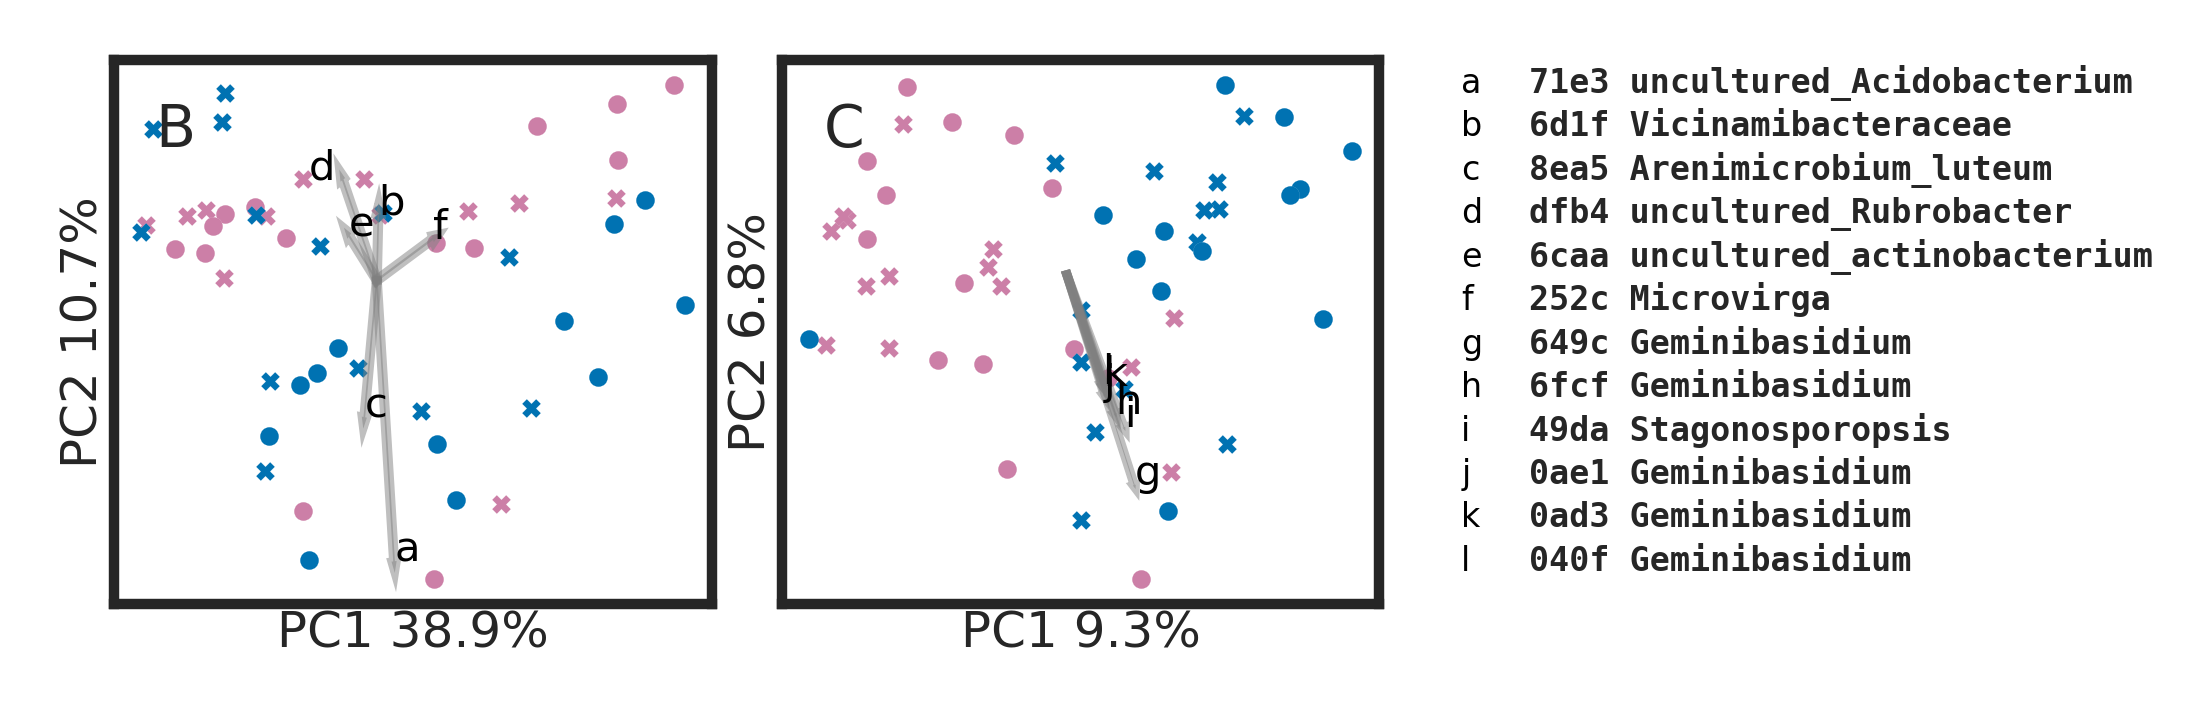

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.spatial.distance import euclidean
%matplotlib inline

def parse_biplot(qza): ### Unzipping qza biplots
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_csv(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None, sep='\t')
    biplot = pd.read_csv(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None, sep='\t')
    nan_cols = []
    for col in biplot:
        if np.isnan(biplot[col].tolist()[0]):
            nan_cols.append(col)
    if len(nan_cols) > 0:
        biplot = biplot.drop(labels=nan_cols,axis=1)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords(axis,axis2,num,biplot): ### Geting coordinats for arrows
    arrow_data = []
    origin = np.zeros_like(biplot.columns)
    biplot['importance'] = biplot.apply(euclidean, axis=1, args=(origin,))
    biplot.sort_values('importance', inplace=True, ascending=False)
    for taxon in biplot.index.tolist()[:num].copy():
        arrow_data.append([taxon,biplot.at[taxon,axis],biplot.at[taxon,axis2]])
    return arrow_data

colora = {
    'Heterogenous': '#0072b2',
    'Homogenous': '#cc7fa7'
}

marka = {
    'Shrub': 'o',
    'Intershrub': 'X'
}

def sub(ordination,metadata,ax):
    for geo in set(metadata.Geodiversity):
        for niche in set(metadata.Niche):
            color = colora[geo]
            marker = marka[niche]
            size = 5
            data = ordination.loc[
                ordination.index.isin(metadata.loc[
                    ((metadata.Niche == niche) & (metadata.Geodiversity == geo))
                ].index)
            ]
            sns.scatterplot(x=x,y=y,
                            data=data,
                            ax=ax,
                            legend=False,
                            color=color,
                            marker=marker,
                            s=size,
                            linewidth=0.01)


z=6 ### Number of features to plot

fig=plt.figure(constrained_layout=True,dpi=600,figsize=(3.3,1.2))
fig.set_constrained_layout_pads(w_pad=0, h_pad=0)
gs = GridSpec(1, 3, width_ratios=[3,3, 1], wspace=0.15)
axes = []
for ax in gs:
    axes.append(fig.add_subplot(ax))

sns.set_style("white")
sns.axes_style("white")
sns.axes_style("white")
    
j=0

letter = 'a'
ax_labels = ['B','C']
arrow_labels_legend = {}
for marker in ['16SrRNA','ITS1']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, sep='\t', index_col=0)
    qza = 'dada/%s/taxonomy.qza' % marker
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/taxonomy.tsv'
    taxa = pd.read_csv(inf,index_col=0,sep='\t')
    !rm -r $digest
    for unifrac in ['weighted_unifrac','unweighted_unifrac']:
        if marker == '16SrRNA' and unifrac == 'unweighted_unifrac':
            continue
        if marker == 'ITS1' and unifrac == 'weighted_unifrac':
            continue
        qza = 'diversity/%s/%s_biplot_results.qza' % (marker,unifrac)
        ordination, biplot, Eigvals, Proportion = parse_biplot(qza)
        
        x=1 ### axis to show
        y=2 ### axis to show
        ax = axes[j]
        j+=1
        sub(ordination,metadata,ax)
        
        ylim = ax.get_ylim()

        arrow_data = get_arrow_coords(x,y,z,biplot)
        
        for arrow in arrow_data:
            arrow_x,text_x = arrow[1],arrow[1]
            arrow_y, text_y = arrow[2], arrow[2]
            if marker == '16SrRNA':
                arrow_y, text_y = arrow[2]*0.3, arrow[2]*0.3
                arrow_x,text_x = arrow[1]*0.3,arrow[1]*0.3
            if marker == 'ITS1':
                arrow_y, text_y = arrow[2]*4, arrow[2]*4
                arrow_x,text_x = arrow[1]*4,arrow[1]*4
            ax.arrow(0, 0, arrow_x, arrow_y, fc='gray',ec='gray',alpha=0.5)
            t = taxa.at[arrow[0],'Taxon'].split(';')[-1]
            k = -2
            while t=='NA':
                t = taxa.at[arrow[0],'Taxon'].split(';')[k]
                k-=1
            T = t.split('__')[1]
            arrow_labels_legend[letter] = arrow[0][:4]+' '+T
            if letter == 'd':
                text_x -= 0.02
            ax.text(text_x, text_y, letter, fontdict={'fontsize': 5, 'color':'black'})
            letter = chr(ord(letter) + 1)

        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[y-1]*100.0),fontdict={'fontsize': 6})
        ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[x-1]*100.0),fontdict={'fontsize': 6})
        ax.xaxis.set_label_coords(0.5, -0.01)
        ax.yaxis.set_label_coords(-0.01, 0.5)
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
        #ax.set_xlim(-0.225,0.21)

ax = axes[j]
sns.axes_style("white")
j+=1
ax.tick_params(axis='both', length=0, pad=0)       
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(0,1)
ax.set_xlim(0,0.25)

legend = sorted(list(arrow_labels_legend.items()))
y = 0.95
#for c in colora:
#    for m in marka:
#        sns.scatterplot([0.03],[y],marker=marka[m],color=colora[c],ax=ax,s=15,legend=False)
#        text = 'Heterogeneous'
#        if c == 'Homogenous':
#            text = 'Homogeneous'
#        n = 'Inter-patch'
#        if m == 'Shrub':
#            n = 'Shrubby patch'
#        ax.text(0.1,y-0.01,"%s %s" % (text,n),fontdict={'size':4})
#        y -= 0.08
for i in legend:
    ax.text(0.015,y-0.01,i[0],fontdict={'size':4,'color':'black'})
    asv = i[1]
    ax.text(0.1,y-0.01,asv,fontdict={'size':4,'family':'monospace','weight':'semibold'})
    y -= 0.08

for a in ['top','bottom','left','right']:
    ax.spines[a].set_visible(False)

plt.savefig('PCoA.png',bbox_inches='tight')

In [393]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiime2 import Artifact
from random import randint

!mkdir -p logistic_regression/16SrRNA logistic_regression/ITS1

for marker in ['16SrRNA','ITS1']:
    
    metadata = pd.read_csv('%s_metadata.tsv' % marker,sep='\t',index_col=0)
    X = Artifact.load('diversity/%s/rarefied_table.qza' % marker).view(pd.DataFrame)
    coefficients = pd.DataFrame(index=X.columns)
    R2 = []
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    y = [metadata.at[i,'Geodiversity'] for i in X.index]
    
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=randint(2,2000),stratify=y)

        regr = LogisticRegression()
        regr.fit(X_train,y_train)
        R2.append(regr.score(X_test,y_test))
        coefficients[i] = regr.coef_[0]
        
    coefficients.to_csv('logistic_regression/%s/coefficients.tsv' % marker, sep='\t')
    with open('logistic_regression/%s/regression_coefficients.txt' % marker, 'wt') as hndl:
        for r in R2:
            hndl.write('%.8f\n' % r)


In [ ]:
from Bio import SeqIO
import pandas as pd

!mkdir -p picrust/16SrRNA/

# ASV sequences
qza = 'dada/16SrRNA/rep-seqs.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/dna-sequences.fasta'
repseqs = SeqIO.to_dict(SeqIO.parse(inf,'fasta'))
!rm -r $digest 

#get biom
qza = 'diversity/16SrRNA/rarefied_table.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/feature-table.biom'
a = !cp $inf picrust/table.biom

# get fasta
outf = 'temp.%s' % digest
a = !biom convert -i $inf -o $outf --to-tsv
biom = pd.read_table(outf,skiprows=1,index_col=0)
    
with open('picrust/16SrRNA/repseq.fasta','wt') as hndl:
    for ind in biom.index:
        r = repseqs[ind]
        hndl.write('>'+r.id+'\n')
        hndl.write(str(r.seq).replace('N','')+'\n')

!rm -r $digest
!rm $outf

!picrust2_pipeline.py \
    -s picrust/16SrRNA/repseq.fasta \
    -i picrust/16SrRNA/table.biom \
    -o picrust/16SrRNA/outputs -p 7

!add_descriptions.py \
    -i picrust/16SrRNA/outputs/EC_metagenome_out/pred_metagenome_unstrat.tsv.gz \
    -m EC \
    -o picrust/16SrRNA/outputs/EC_metagenome_out/pred_metagenome_unstrat_descrip.tsv.gz

!add_descriptions.py \
    -i picrust/16SrRNA/outputs/pathways_out/path_abun_unstrat.tsv.gz \
    -m METACYC \
    -o picrust/16SrRNA/outputs/pathways_out/path_abun_unstrat_descrip.tsv.gz

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiime2 import Artifact
from random import randint

for marker in ['16SrRNA']:
    
    metadata = pd.read_csv('%s_metadata.tsv' % marker,sep='\t',index_col=0)
    gene_table = 'picrust/16SrRNA/outputs/KO_metagenome_out/pred_metagenome_unstrat.tsv.gz'
    gene_X = pd.read_csv(gene_table, index_col=0,sep='\t').transpose()
    coefficients = pd.DataFrame(index=gene_X.columns)
    R2 = []
    scaler = StandardScaler()
    scaler.fit(gene_X)
    gene_X_scaled = scaler.transform(gene_X)
    y = [metadata.at[i,'Geodiversity'] for i in gene_X.index]
    
    for i in range(100):
        
        randseed = randint(2,2000)
        
        X_train, X_test, y_train, y_test = train_test_split(gene_X_scaled, y, test_size=0.5, random_state=randseed,stratify=y)

        regr = LogisticRegression()
        regr.fit(X_train,y_train)
        
        R2.append(regr.score(X_test,y_test))
        coefficients[i] = regr.coef_[0]
            
    coefficients.to_csv('picrust/%s/coefficients.tsv' % marker, sep='\t')
    with open('picrust/%s/regression_coefficients.txt' % marker, 'wt') as hndl:
        for r in R2:
            hndl.write('%.8f\n' % r)

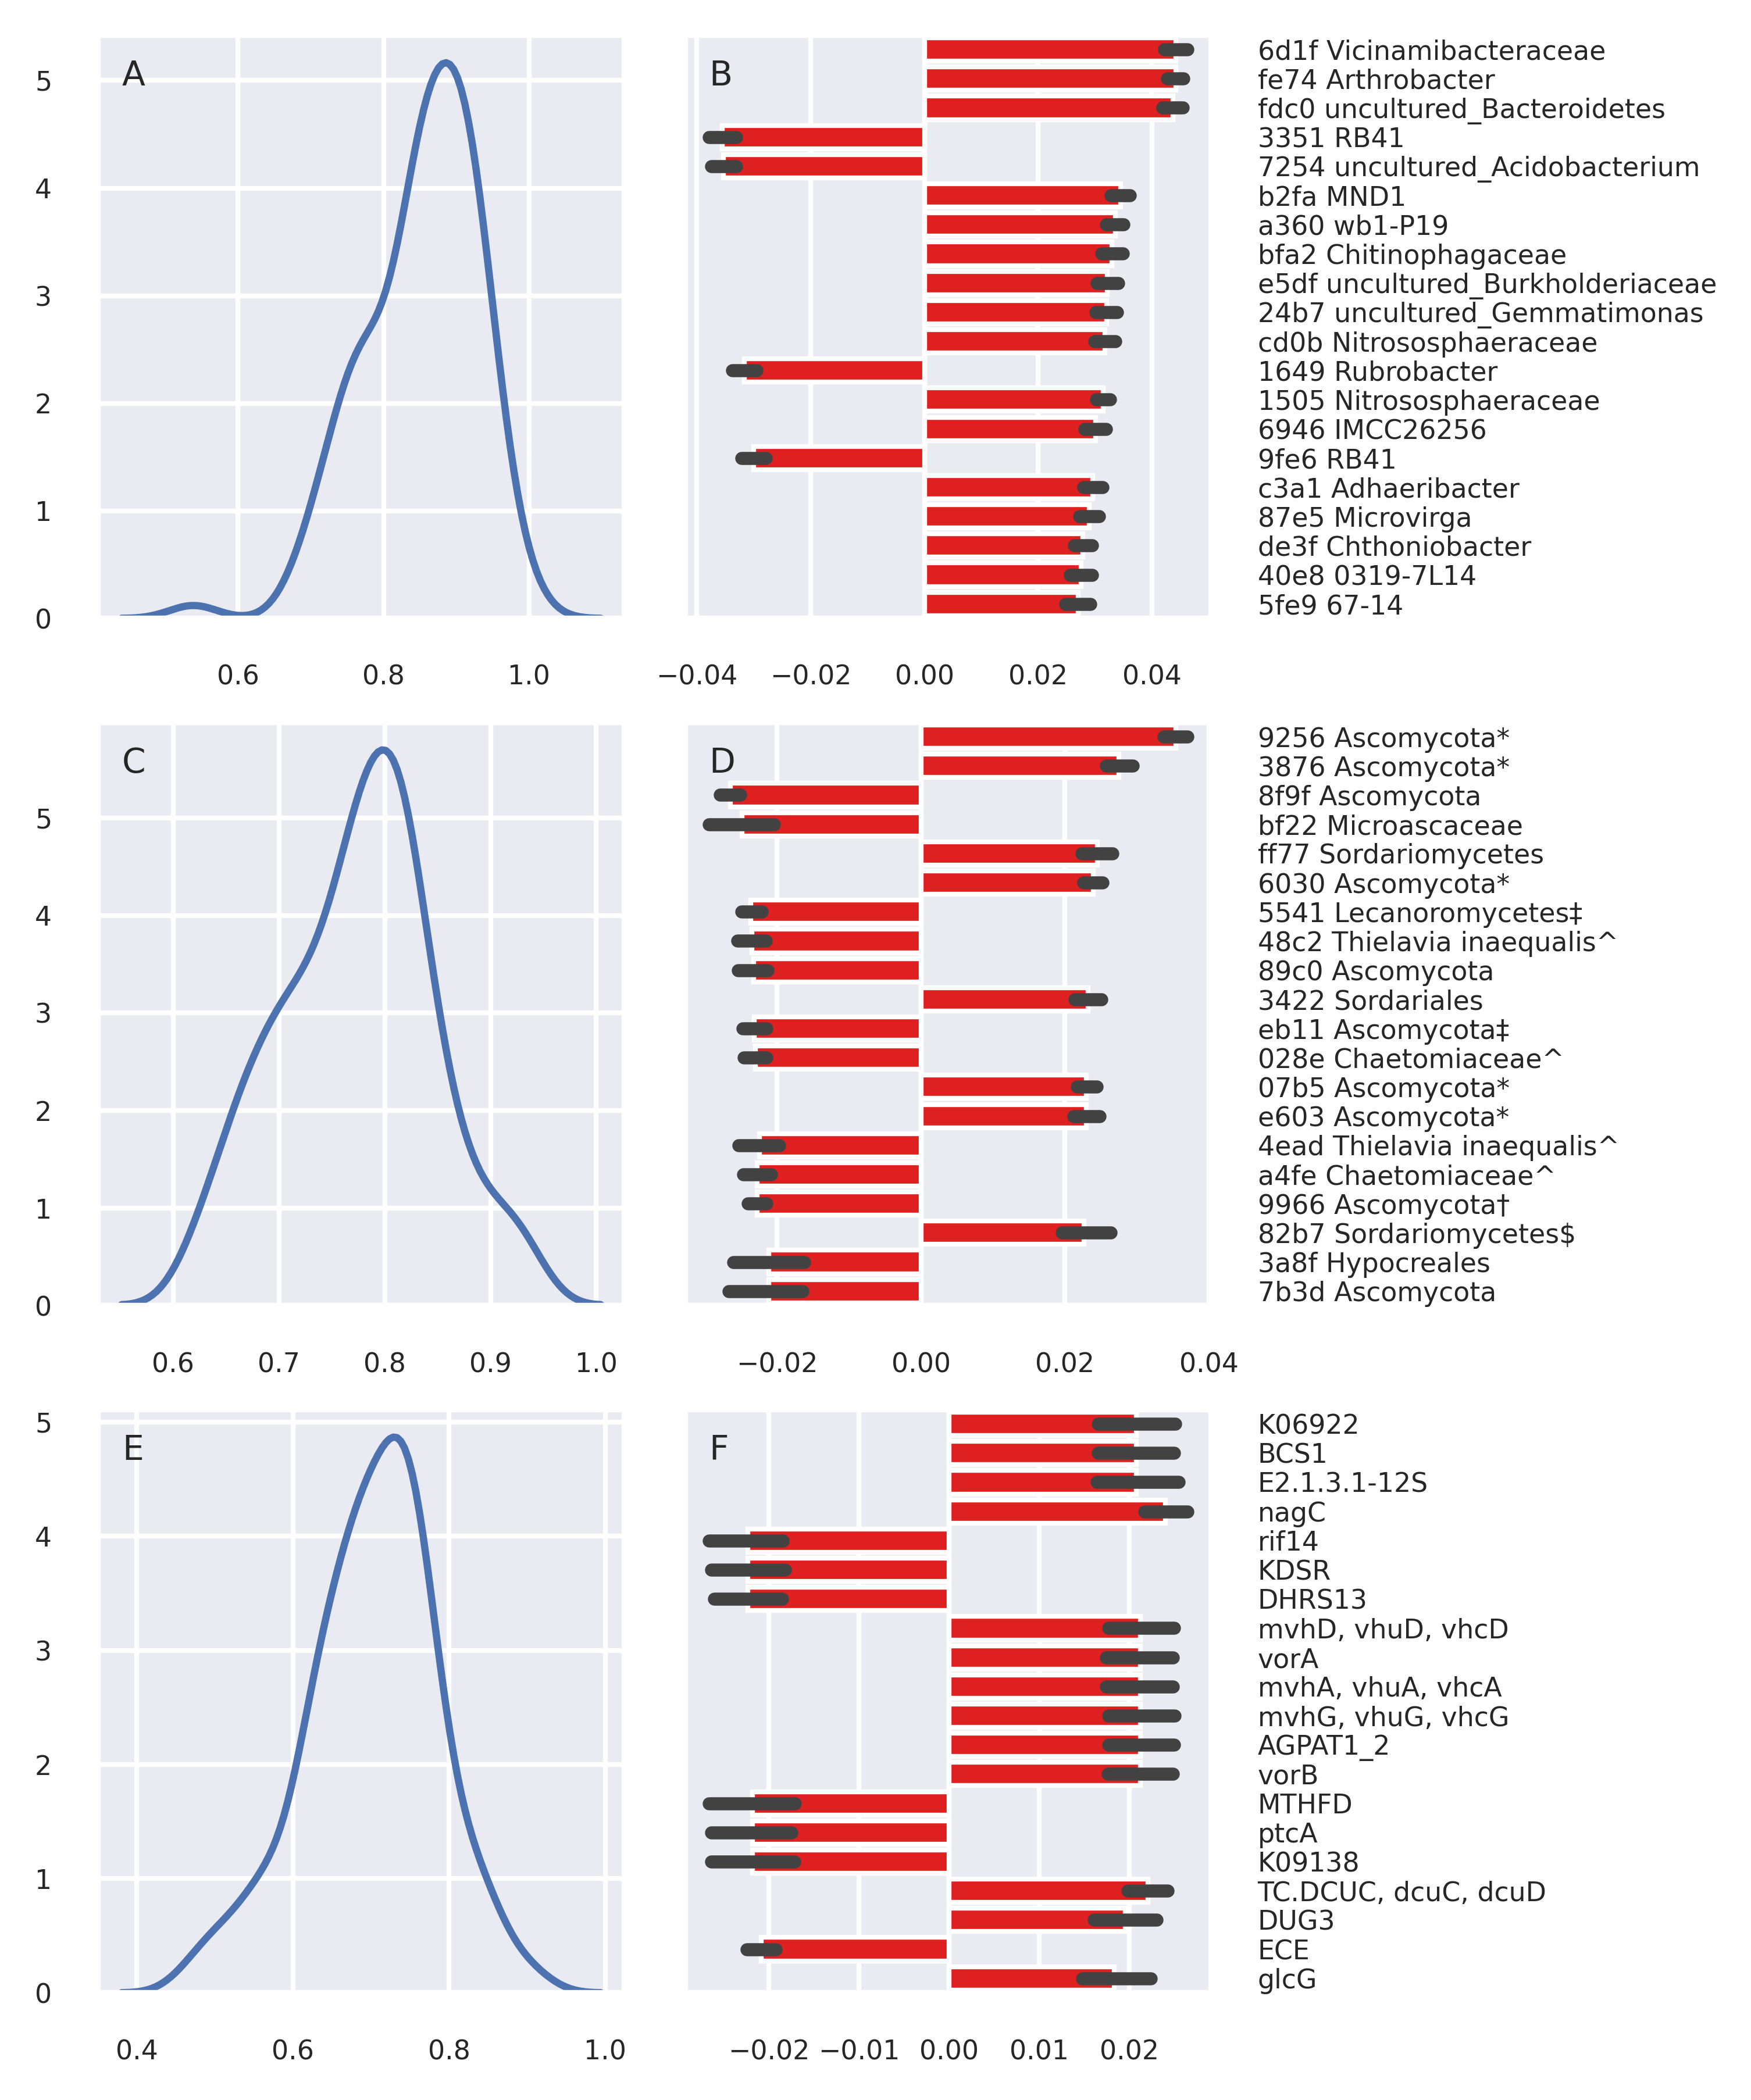

In [622]:
fig, axes = plt.subplots(3,2,dpi=600,figsize=(5,6),tight_layout=True)

axinds = [0,0,0,1,1,0,1,1,2,0,2,1]
ax_labels = ['A','B','C','D','E','F']

for marker in ['16SrRNA','ITS1']:
    
    qza = 'dada/%s/taxonomy.qza' % marker
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/taxonomy.tsv'
    taxa = pd.read_csv(inf,index_col=0,sep='\t')
    a = !rm -r $digest
    
    R2 = [float(i.rstrip()) for i in open('logistic_regression/%s/regression_coefficients.txt'%marker,'r').readlines()]
    coefficients = pd.read_csv('logistic_regression/%s/coefficients.tsv' % marker, sep='\t', index_col=0)
    
    new_index = []
    if marker == '16SrRNA':
        for asv in coefficients.index:
            levels = taxa.at[asv,'Taxon'].split(';')[::-1]
            while levels[0].split('__')[1]  in ['uncultured','uncultured_bacterium']:
                levels.pop(0)
            new_index.append(asv[:4] + ' ' + levels[0].split('__')[1])
    else:
        for asv in coefficients.index:
            suffix = ''
            if asv[:4] in ['e603','6030','3876','07b5','9256']:
                suffix='*'
            elif asv[:4] in ['4ead', '48c2', '028e', 'a4fe']:
                suffix='^'
            elif asv[:4] in ['8f9e', '9966']:
                suffix='†'
            elif asv[:4] in ['eb11','5541']:
                suffix='‡'
            elif asv[:4] == '82b7':
                suffix='$'
                
            levels = taxa.at[asv,'Taxon'].split(';')[::-1] 
            if levels[0] != 'NA':
                new_index.append(asv[:4] + ' ' + levels[1].split('__')[1]+ ' ' + levels[0].split('__')[1]+suffix)
            else:
                while levels[0] == 'NA':
                    levels.pop(0)
                new_index.append(asv[:4] + ' ' + levels[0].split('__')[1]+suffix)
    coefficients.index = new_index
                               
    ax = axes[axinds.pop(0)][axinds.pop(0)]
    sns.distplot(R2,hist=False,ax=ax)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    
    def get_mean_coef(series):
        return np.average([abs(i) for i in series])
    
    coefficients['Mean'] = coefficients.apply(get_mean_coef,axis=1)  
    coefficients = coefficients.sort_values('Mean',ascending=False)
    coefficients = coefficients.drop('Mean',axis=1)
    coefficients = coefficients.loc[coefficients.index.tolist()[:20],:].transpose()
    ax = axes[axinds.pop(0)][axinds.pop(0)]
    sns.barplot(data=coefficients,ax=ax,orient='h',color='red')
    ax.tick_params(labelleft=False, labelright=True)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)


for marker in ['16SrRNA']:
    
    R2 = [float(i.rstrip()) for i in open('picrust/%s/regression_coefficients.txt'%marker,'r').readlines()]
    coefficients = pd.read_csv('picrust/%s/coefficients.tsv' % marker, sep='\t', index_col=0)
                               
    ax = axes[axinds.pop(0)][axinds.pop(0)]
    sns.distplot(R2,hist=False,ax=ax)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    
    def get_mean_coef(series):
        return np.average([abs(i) for i in series])
    
    coefficients['Mean'] = coefficients.apply(get_mean_coef,axis=1)  
    coefficients = coefficients.sort_values('Mean',ascending=False).iloc[:20,:].transpose()
    coefficients.drop('Mean')
    
    new_cols = []
    
    for col in coefficients:
        result = REST.kegg_get(col).readlines()
        name = result[1].replace('NAME        ','').rstrip()
        description = result[2].replace('DEFINITION  ','').rstrip()
        new_cols.append(name)
    coefficients.columns = new_cols

    ax = axes[axinds.pop(0)][axinds.pop(0)]
    sns.barplot(data=coefficients,ax=ax,orient='h',color='red',estimator=np.average)
    ax.tick_params(labelleft=False, labelright=True)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    ax.set_ylabel('')
    
fig.savefig('logistic_regression.png',bbox_inches='tight')

In [135]:
from Bio.KEGG import REST
for marker in ['16SrRNA']:
    
    R2 = [float(i.rstrip()) for i in open('picrust/%s/regression_coefficients.txt'%marker,'r').readlines()]
    coefficients = pd.read_csv('picrust/%s/coefficients.tsv' % marker, sep='\t', index_col=0)
                                   
    def get_mean_coef(series):
        return np.average([abs(i) for i in series])
    
    coefficients['Mean'] = coefficients.apply(get_mean_coef,axis=1)  
    coefficients = coefficients.sort_values('Mean',ascending=False).iloc[:20,:].transpose()
    coefficients.drop('Mean')
    
    new_cols = []
    
    for col in coefficients:
        result = REST.kegg_get(col).readlines()
        name = result[1].replace('NAME        ','').rstrip()
        description = result[2].replace('DEFINITION  ','').rstrip()
        print(col,name, description)
        new_cols.append(name)
    coefficients.columns = new_cols

K06922 K06922 uncharacterized protein
K08900 BCS1 mitochondrial chaperone BCS1
K17489 E2.1.3.1-12S methylmalonyl-CoA carboxyltransferase 12S subunit [EC:2.1.3.1]
K02565 nagC N-acetylglucosamine repressor
K15467 rif14 27-O-demethylrifamycin SV methyltransferase [EC:2.1.1.315]
K04708 KDSR 3-dehydrosphinganine reductase [EC:1.1.1.102]
K11169 DHRS13 dehydrogenase/reductase SDR family member 13 [EC:1.1.-.-]
K14127 mvhD, vhuD, vhcD F420-non-reducing hydrogenase iron-sulfur subunit [EC:1.12.99.- 1.8.98.5 1.8.98.6]
K00186 vorA 2-oxoisovalerate ferredoxin oxidoreductase alpha subunit [EC:1.2.7.7]
K14126 mvhA, vhuA, vhcA F420-non-reducing hydrogenase large subunit [EC:1.12.99.- 1.8.98.5]
K14128 mvhG, vhuG, vhcG F420-non-reducing hydrogenase small subunit [EC:1.12.99.- 1.8.98.5]
K13509 AGPAT1_2 lysophosphatidate acyltransferase [EC:2.3.1.51]
K00187 vorB 2-oxoisovalerate ferredoxin oxidoreductase beta subunit [EC:1.2.7.7]
K00288 MTHFD methylenetetrahydrofolate dehydrogenase (NADP+) / methenyltetra

In [122]:
from qiime2 import Artifact

df = Artifact.load('diversity/ITS1/rarefied_table.qza').view(pd.DataFrame)
get = [i for i in df.columns if i.startswith('9256')][0]
df = df.loc[:,[get]]
metadata = pd.read_csv('ITS1_metadata.tsv',index_col=0,sep='\t')
df['geodiversity'] = metadata.Geodiversity
df.sort_values(get)

92563d0ceba4a3712941e200e032a98a  geodiversity
ITS-AS3000                               0.0    Homogenous
ITS-AS3032                               0.0  Heterogenous
ITS-AS3033                               0.0  Heterogenous
ITS-AS3034                               0.0  Heterogenous
ITS-AS3036                               0.0  Heterogenous
ITS-AS3037                               0.0  Heterogenous
ITS-AS3038                               0.0  Heterogenous
ITS-AS3039                               0.0  Heterogenous
ITS-AS3040                               0.0  Heterogenous
ITS-AS3041                               0.0  Heterogenous
ITS-AS3042                               0.0  Heterogenous
ITS-AS3044                               0.0  Heterogenous
ITS-AS3045                               0.0  Heterogenous
ITS-AS3046                               0.0  Heterogenous
ITS-AS3047                               0.0  Heterogenous
ITS-AS3049                               0.0  Heterogenous
ITS-AS3050                               0.0  Heterogenous
ITS-AS3051                               0.0  Heterogenous
ITS-AS3052                               0.0  Heterogenous
ITS-AS3053                               0.0  Heterogenous
ITS-AS3054                               0.0  Heterogenous
ITS-AS3055                               0.0  Heterogenous
ITS-AS3056                               0.0  Heterogenous
ITS-AS3057                               0.0  Heterogenous
ITS-AS3031                               0.0  Heterogenous
ITS-AS3058                               0.0  Heterogenous
ITS-AS3059                               0.0  Heterogenous
ITS-AS3016                               0.0    Homogenous
ITS-AS3025                               0.0    Homogenous
ITS-AS3004                               0.0    Homogenous
ITS-AS3011                               0.0    Homogenous
ITS-AS3013                               0.0    Homogenous
ITS-AS3001                               0.0    Homogenous
ITS-AS3002                               0.0    Homogenous
ITS-AS3003                               0.0    Homogenous
ITS-AS3017                               0.0    Homogenous
ITS-AS3005                               0.0    Homogenous
ITS-AS3015                               0.0    Homogenous
ITS-AS3007                               9.0    Homogenous
ITS-AS3022                              11.0    Homogenous
ITS-AS3009                              19.0    Homogenous
ITS-AS3012                              24.0    Homogenous
ITS-AS3023                              26.0    Homogenous
ITS-AS3018                              31.0    Homogenous
ITS-AS3021                              32.0    Homogenous
ITS-AS3026                              34.0    Homogenous
ITS-AS3028                              37.0    Homogenous
ITS-AS3020                              42.0    Homogenous
ITS-AS3014                              47.0    Homogenous
ITS-AS3010                              49.0    Homogenous
ITS-AS3008                              52.0    Homogenous
ITS-AS3019                              59.0    Homogenous
ITS-AS3006                             104.0    Homogenous
ITS-AS3029                             114.0    Homogenous

In [132]:
df = Artifact.load('diversity/ITS1/rarefied_table.qza').view(pd.DataFrame)
t = Artifact.load('dada/ITS1/taxonomy.qza').view(pd.DataFrame)
get = [i for i in df.columns if i.startswith('3a8f')][0]
t.at[get,'Taxon']

'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;NA;NA;NA'

In [ ]:
*Ascomycota e603d0, 60300d, 38766e, 07b52c, 92563d are Phaeosphaeriaceae according to tree, https://link.springer.com/article/10.1007/s13225-014-0308-3#citeas
$Sordariomycetes 82b7 is Hypocreales according to tree (entemopathogens Laboratory techniques used for entomopathogenic fungi: Hypocreales)
^4ead, 48c2, 028e, a4fe are Thielavia inaequalis according to tree
†Ascomycota 8f9e, 9966 are the same according to tree
‡eb1169,55415a are the same (Lecanoromycetes)

In [488]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiime2 import Artifact
from random import randint

for marker in ['16SrRNA']:
    
    metadata = pd.read_csv('%s_metadata.tsv' % marker,sep='\t',index_col=0)
    exchange = pd.read_parquet('micom/16SrRNA/exchange_fluxes.parquet')
    def m(metabolite):
        return metabolite.replace('[e]','').replace('_m','')
    exchange['m'] = exchange.metabolite.apply(m)
    exchange_X = pd.pivot_table(exchange,values='flux',index='sample_id',columns='m',aggfunc=sum).fillna(0)
    coefficients = pd.DataFrame(index=exchange_X.columns)
    R2 = []
    scaler = StandardScaler()
    scaler.fit(exchange_X)
    exchange_X_scaled = scaler.transform(exchange_X)
    y = [metadata.at[i,'Geodiversity'] for i in exchange_X.index]
    
    for i in range(100):
        
        randseed = randint(2,2000)
        
        X_train, X_test, y_train, y_test = train_test_split(exchange_X_scaled, y, test_size=0.5, random_state=randseed,stratify=y)

        regr = LogisticRegression()
        regr.fit(X_train,y_train)
        
        R2.append(regr.score(X_test,y_test))
        coefficients[i] = regr.coef_[0]
            
    coefficients.to_csv('micom/%s/coefficients.tsv' % marker, sep='\t')
    with open('micom/%s/regression_coefficients.txt' % marker, 'wt') as hndl:
        for r in R2:
            hndl.write('%.8f\n' % r)

In [610]:
coefs_fung = pd.read_csv('logistic_regression/ITS1/coefficients.tsv',sep='\t',index_col=0)
coefs_fung['Mean'] = coefs_fung.mean(axis=1)
coefs_fung = coefs_fung.sort_values('Mean',key=lambda h: abs(h), ascending=False).iloc[:19].index
    
qza = 'dada/ITS1/rep-seqs.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
fasta = digest + '/data/dna-sequences.fasta'
records = SeqIO.to_dict(SeqIO.parse(fasta,'fasta'))
for i in list(records.keys()):
    if i not in coefs_fung:
        del records[i]
a = !rm -r $digest

!mkdir phylogenies
SeqIO.write(records.values(),'phylogenies/fungi.fasta','fasta')

mkdir: cannot create directory ‘phylogenies’: File exists


19

In [615]:
from Bio import SeqIO
from gzip import open as gopen

!mkdir phylogenies

a = !makeblastdb -in DB/sh_general_release_dynamic_02.02.2019.fasta -dbtype nucl -out unite -title unite

b = !blastn -query phylogenies/fungi.fasta -out phylogenies/fungi.out -outfmt 6 -max_hsps 1 -max_target_seqs 50 -db unite

from gzip import open as gopen

refs = SeqIO.to_dict(SeqIO.parse('DB/sh_general_release_dynamic_02.02.2019.fasta','fasta'))
 
blast = pd.read_csv('phylogenies/fungi.out',sep='\t',header=None)
blast =set([i for i in blast[1]])
with open('phylogenies/fungi_with_refs.fasta','wt') as hndl:
    for i in blast:
        hndl.write(refs[i].format('fasta'))
    hndl.write(open('phylogenies/fungi.fasta','r').read())
a = !mafft --maxiterate 1000 --localpair --thread 14 phylogenies/fungi_with_refs.fasta > phylogenies/fungi_with_refs.aln.fasta
a = !trimal -in phylogenies/fungi_with_refs.aln.fasta -out phylogenies/fungi_with_refs.trm.fasta -gt 0.1


mkdir: cannot create directory ‘phylogenies’: File exists


In [618]:
ref_records = SeqIO.parse('phylogenies/fungi_with_refs.trm.fasta','fasta')

with open('phylogenies/fungi_with_refs.corrected.fasta','wt') as hndl:
    for r in ref_records:
        if '|' not in r.id:
            hndl.write(r.format('fasta'))
            continue
        r.id = r.id.split('|')[1]
        hndl.write(r.format('fasta'))

a = !raxmlHPC-PTHREADS -s phylogenies/fungi_with_refs.corrected.fasta -f a -x 123 -N 100 -n fungi -m GTRGAMMA -p 456 -T 10 -w /home/amir/Dropbox/DropboxOnBioPC91/GeoDiversity/phylogenies

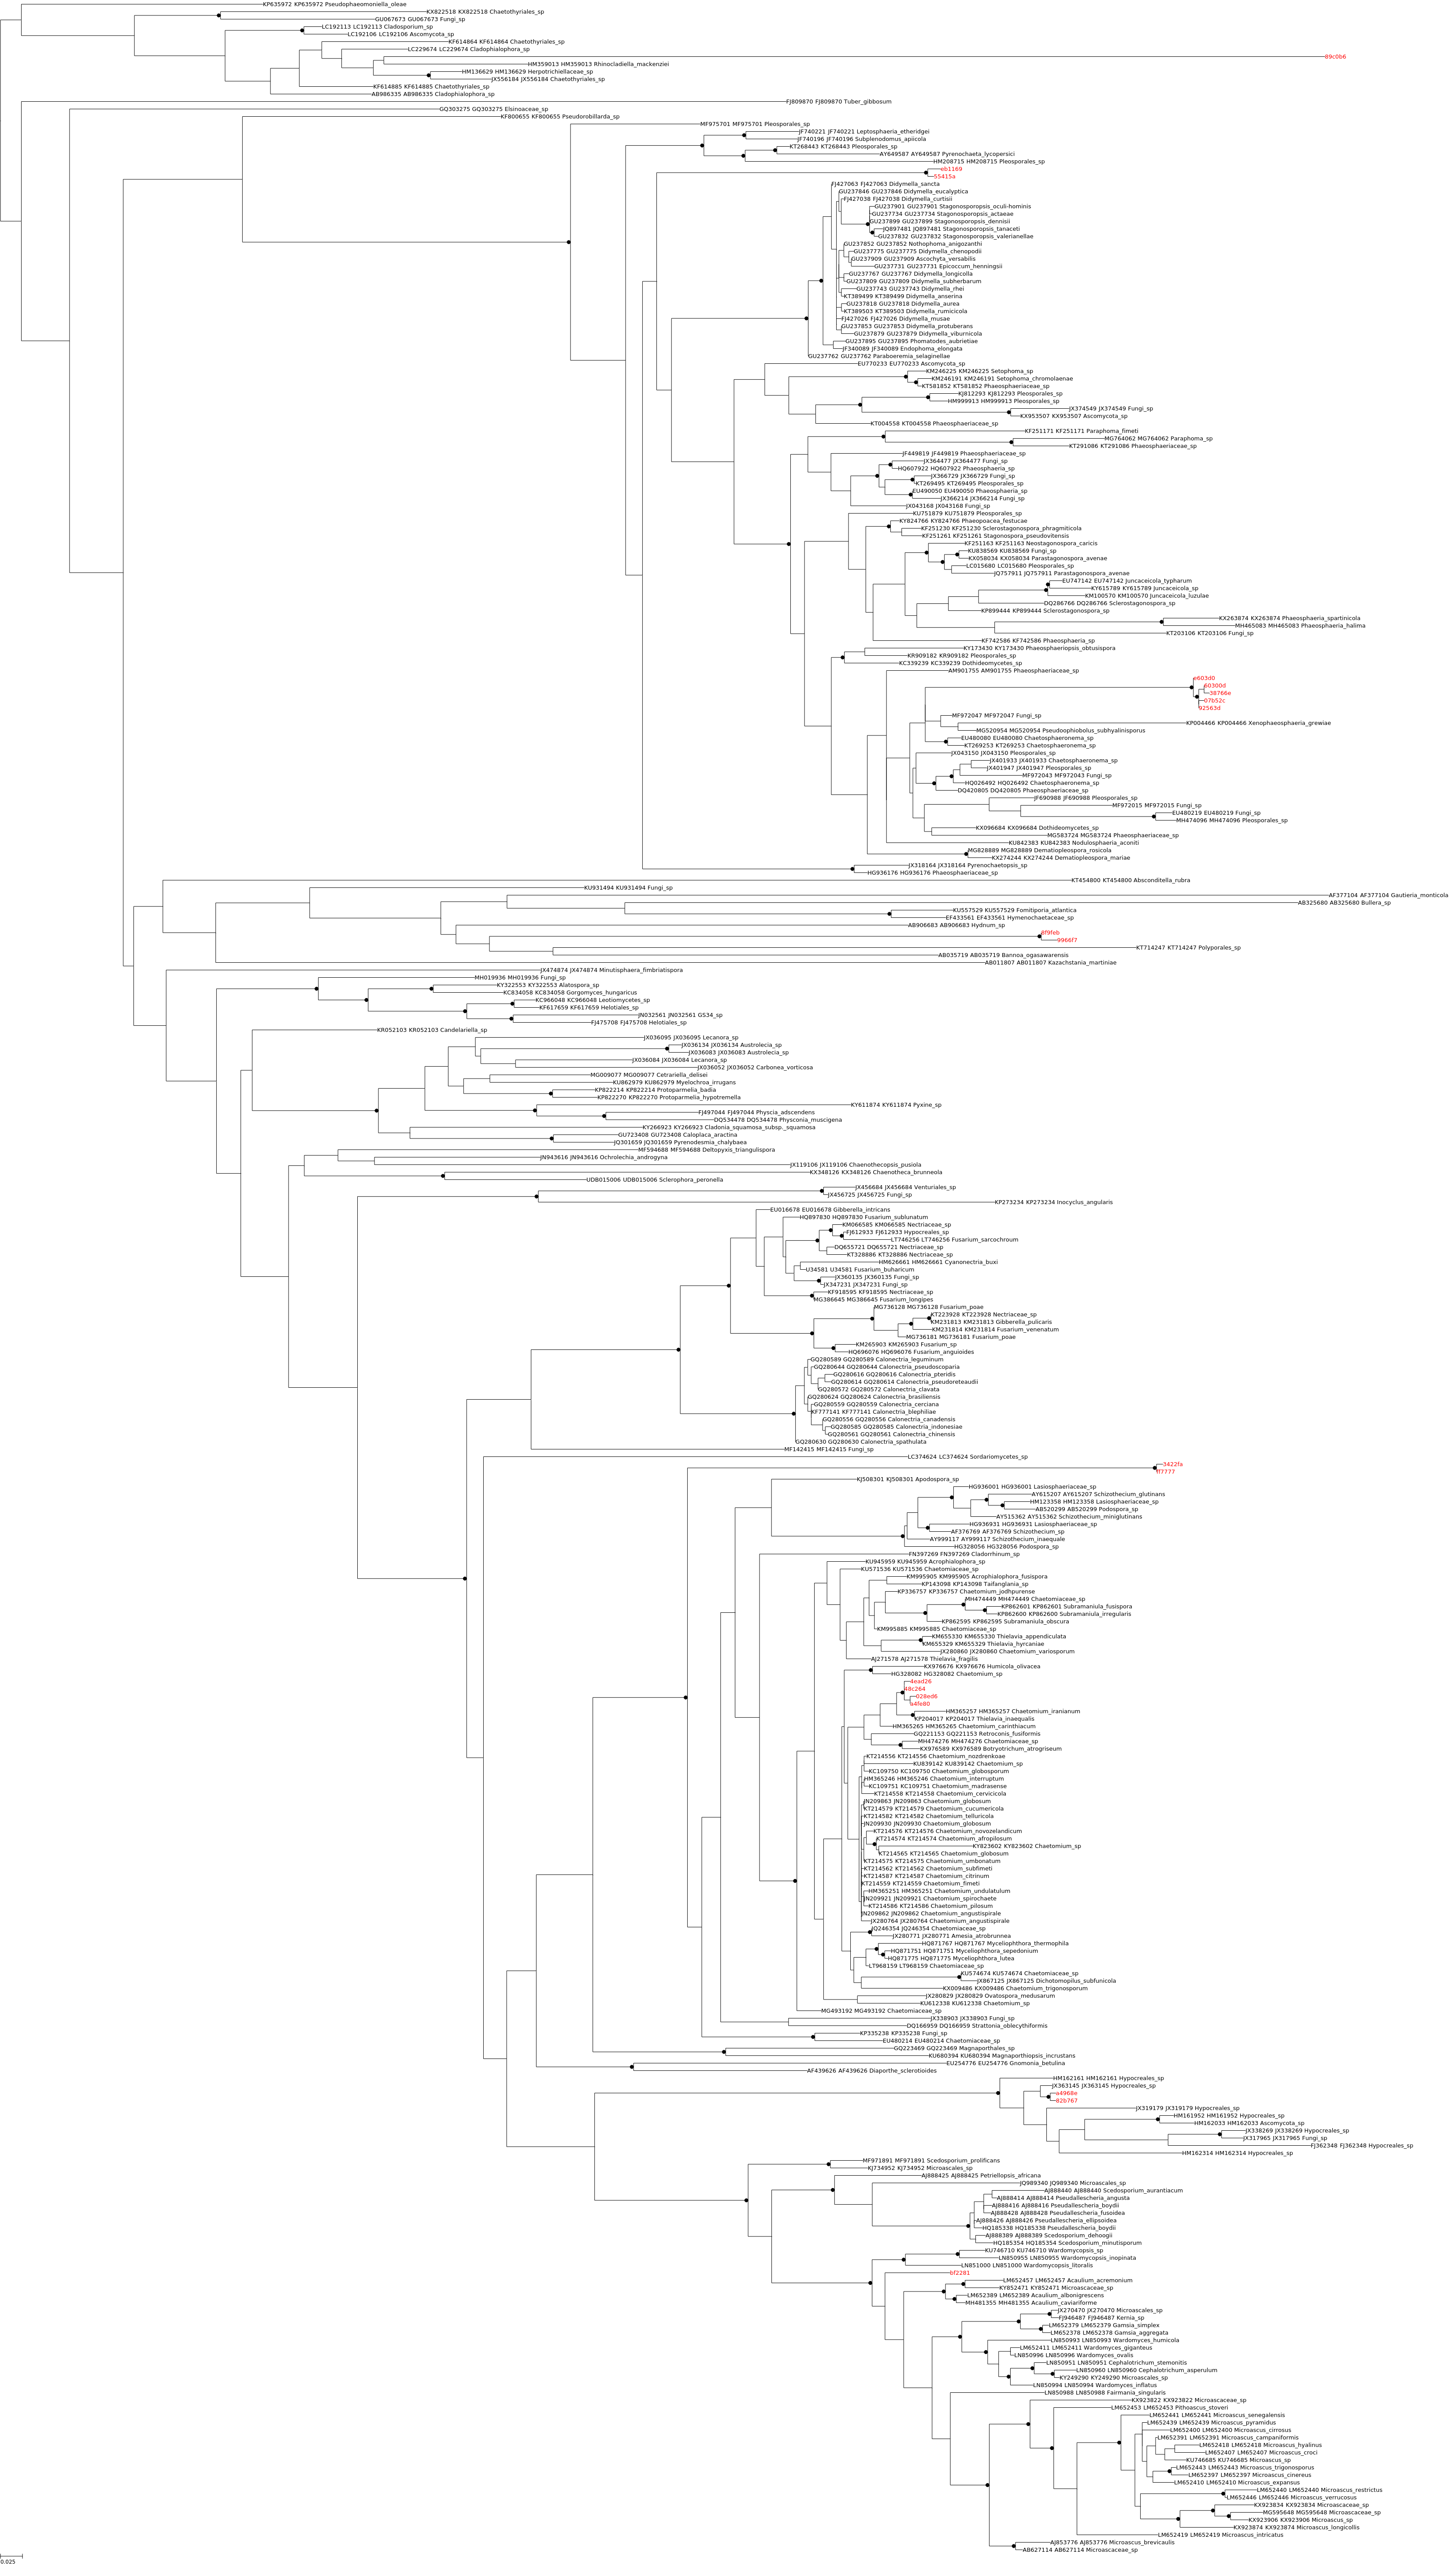

In [3]:
from ete3 import Tree, TextFace, CircleFace, NodeStyle, TreeStyle
from gzip import open as gopen
from Bio import Entrez, SeqIO
Entrez.email = "amir@adssc.org"

refs = SeqIO.to_dict(SeqIO.parse('phylogenies/fungi_with_refs.corrected.fasta','fasta'))

t = Tree('phylogenies/RAxML_bipartitions.fungi')

ns = NodeStyle()
ns['size'] = 0

t.set_outgroup(t.get_midpoint_outgroup())
for n in t.traverse():
    n.set_style(ns)
    if n.is_leaf():
        if len(n.name) < 10:
            color = 'black'
            desc =   refs[n.name].description.split('|')[0]
            n.add_face(TextFace(n.name + ' ',fgcolor='black'),0,position='branch-right')
            n.add_face(TextFace(desc,fgcolor=color),1,position='branch-right')
            #if desc.startswith('Pseudomonas'):
            #    color='blue'
            r = None
            #try:
            #    n.add_face(TextFace(n.name + ' ',fgcolor='black'),0,position='branch-right')
            #    n.add_face(TextFace(desc,fgcolor=color),1,position='branch-right')
            #    handle = Entrez.efetch(db="nucleotide", id=n.name, rettype="gb", retmode="text")
            #    r = SeqIO.read(handle,'gb')
            #    handle.close()
            #except:
            #    r = None
            #if r and 'isolation_source' in r.features[0].qualifiers:
            #    source = r.features[0].qualifiers['isolation_source'][0]
            #    n.add_face(TextFace(' '+source,fgcolor='green'),2,position='branch-right')
        else:
            n.add_face(TextFace(n.name[:6],fgcolor='red'),0,position='branch-right')
    elif n.support > 65:
        n.add_face(CircleFace(4,'black'),0,position='float')
            
ts = TreeStyle()
ts.show_leaf_name = False
ts.scale=2000

t.render('phylogenies/fungi.png',tree_style=ts,dpi=900,w=4000)            
t.render('%%inline',tree_style=ts,dpi=600)

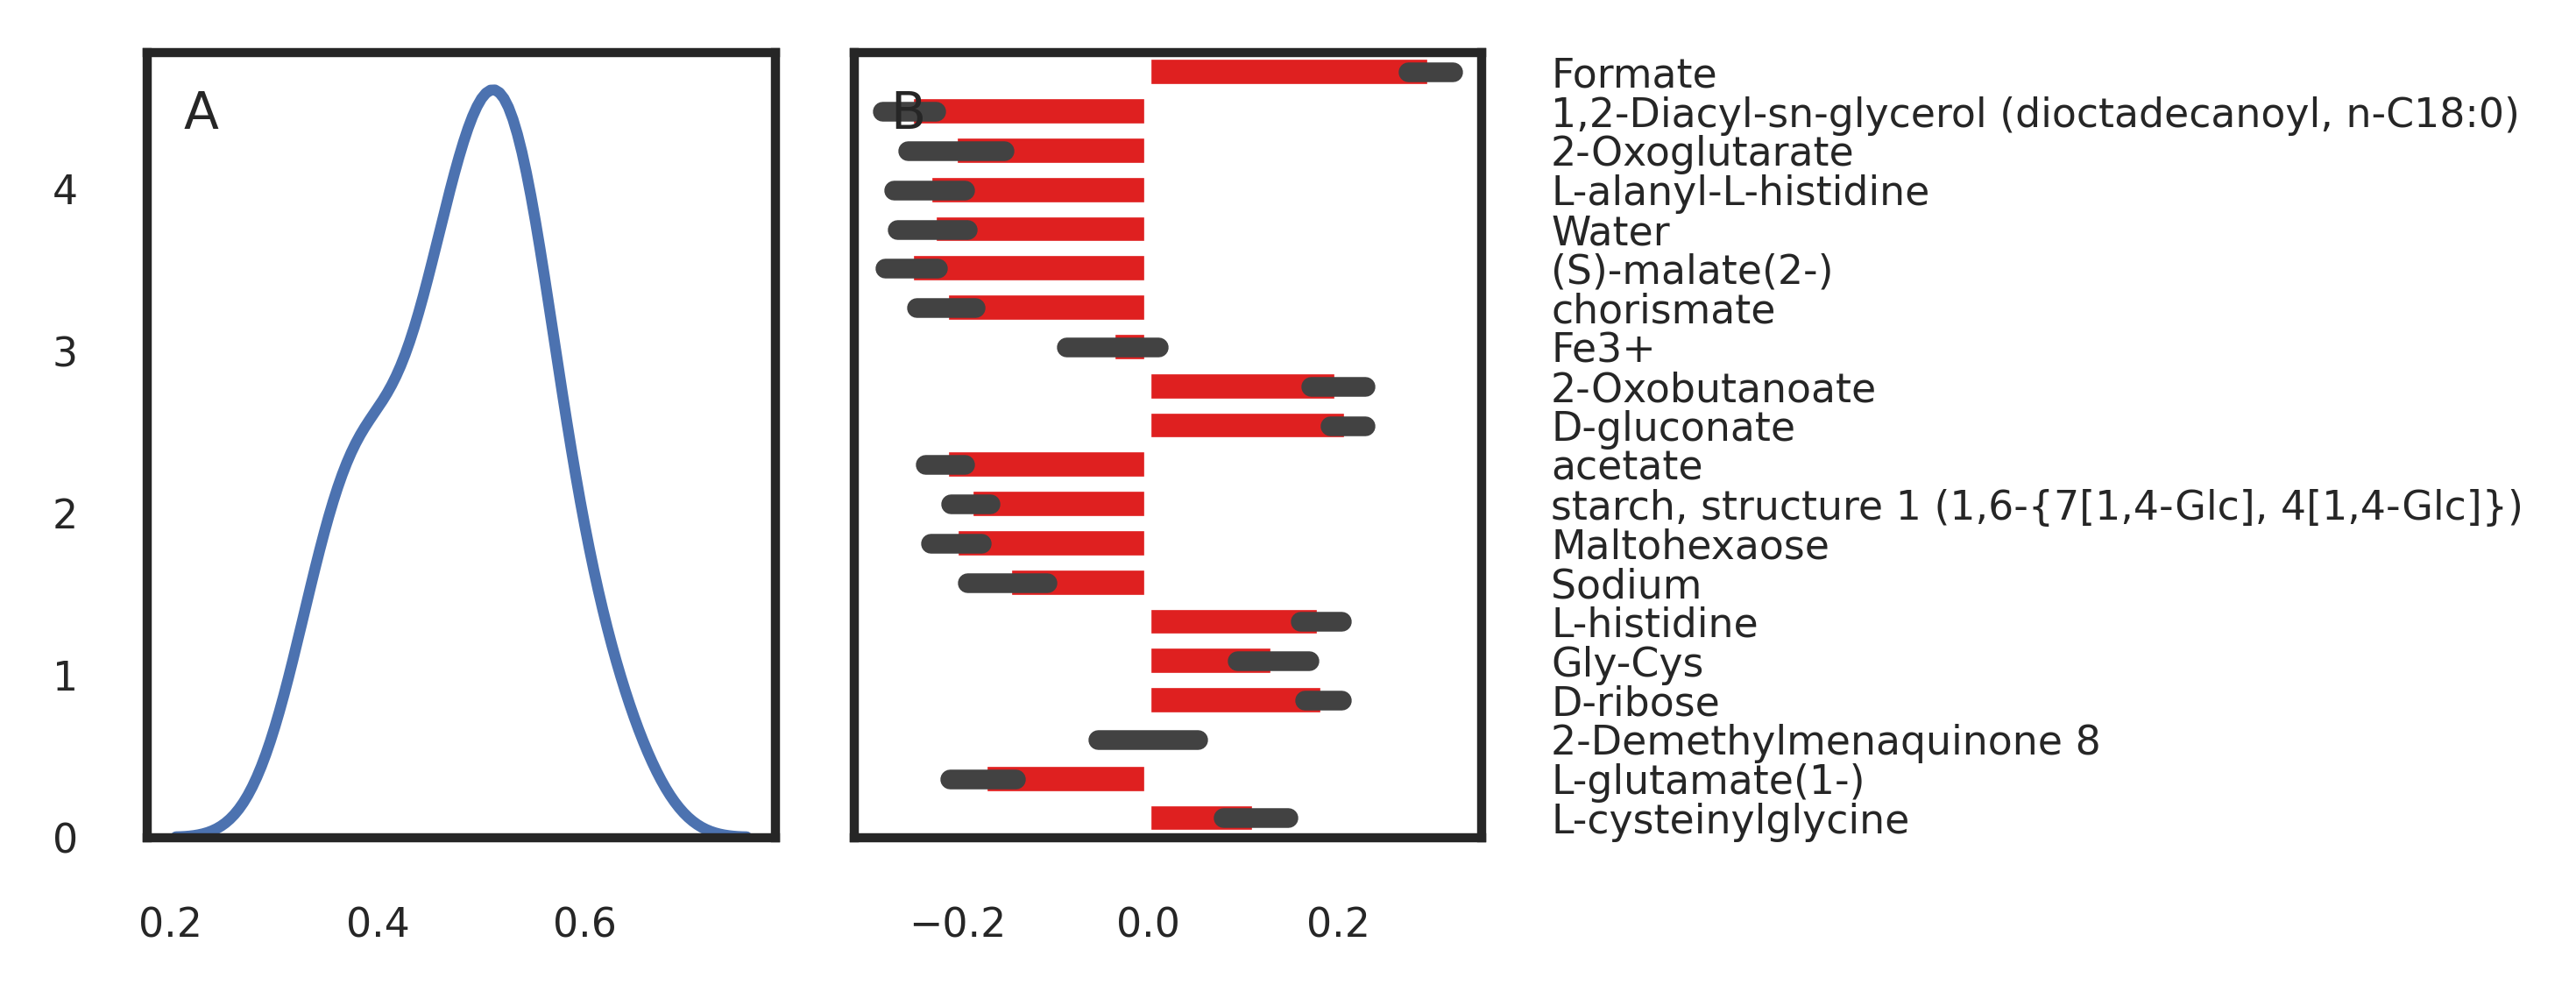

In [490]:
annotations = pd.read_csv('micom/16SrRNA/annotations.csv')
names = {}
for ind, row in annotations.iterrows():
    names[row['metabolite'].replace('_m','').replace('[e]','')] = row['name']
metadata = pd.read_csv('16SrRNA_metadata.tsv',index_col=0,sep='\t')

fig, axes = plt.subplots(1,2,dpi=600,figsize=(5,2),tight_layout=True)

axinds = [0,1]
ax_labels = ['A','B']

for marker in ['16SrRNA']:
    
    R2 = [float(i.rstrip()) for i in open('micom/%s/regression_coefficients.txt'%marker,'r').readlines()]
    coefficients = pd.read_csv('micom/%s/coefficients.tsv' % marker, sep='\t', index_col=0)
    
    new_index = []
    for m in coefficients.index:
        new_index.append(names[m])
    coefficients.index = new_index
                               
    ax = axes[axinds.pop(0)]
    sns.distplot(R2,hist=False,ax=ax)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    
    def get_mean_coef(series):
        return np.average([abs(i) for i in series])
    
    coefficients['Mean'] = coefficients.apply(get_mean_coef,axis=1)  
    coefficients = coefficients.sort_values('Mean',ascending=False)
    coefficients = coefficients.drop('Mean',axis=1)
    coefficients = coefficients.loc[coefficients.index.tolist()[:20],:].transpose()
    
    ax = axes[axinds.pop(0)]
    sns.barplot(data=coefficients,ax=ax,orient='h',color='red')
    ax.tick_params(labelleft=False, labelright=True)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    
fig.savefig('m_logistic_regression.png',bbox_inches='tight')

In [506]:
mwu_results = pd.DataFrame(columns=['u','p'])

homo_samples = [i for i in exchange_X.index if i in metadata.loc[metadata.Geodiversity=='Homogenous'].index]
hetero_samples = [i for i in exchange_X.index if i in metadata.loc[metadata.Geodiversity=='Heterogenous'].index]

for col in exchange_X:
    try:
        mwu_results.loc[col] = mwu(exchange_X.loc[homo_samples,[col]].squeeze(),exchange_X.loc[hetero_samples,[col]].squeeze())
    except:
        continue
mwu_results['q'] = (multipletests(mwu_results.p,method='fdr_bh'))[1]

In [508]:
mwu_results.sort_values('q')

u         p         q
dad_2     195.0  0.007302  0.366750
glyc      203.0  0.011030  0.366750
rib_D     203.5  0.005318  0.366750
his_L     203.0  0.010850  0.366750
12dgr180  287.5  0.043689  0.385760
...         ...       ...       ...
hxan      324.0  0.496057  0.496141
chol      324.0  0.495669  0.496141
mnl       325.0  0.488827  0.496141
ser_L     320.5  0.469954  0.496141
etoh      322.0  0.480154  0.496141

[133 rows x 3 columns]

In [542]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiime2 import Artifact
from random import randint

for marker in ['16SrRNA']:
    
    metadata = pd.read_csv('%s_metadata.tsv' % marker,sep='\t',index_col=0)
    gene_table = 'picrust/16SrRNA/outputs/pathways_out/path_abun_unstrat.tsv.gz'
    gene_X = pd.read_csv(gene_table, index_col=0,sep='\t').transpose()
    coefficients = pd.DataFrame(index=gene_X.columns)
    R2 = []
    scaler = StandardScaler()
    scaler.fit(gene_X)
    gene_X_scaled = scaler.transform(gene_X)
    y = [metadata.at[i,'Geodiversity'] for i in gene_X.index]
    
    for i in range(100):
        
        randseed = randint(2,2000)
        
        X_train, X_test, y_train, y_test = train_test_split(gene_X_scaled, y, test_size=0.5, random_state=randseed,stratify=y)

        regr = LogisticRegression()
        regr.fit(X_train,y_train)
        
        R2.append(regr.score(X_test,y_test))
        coefficients[i] = regr.coef_[0]
            
    coefficients.to_csv('picrust/%s/p_coefficients.tsv' % marker, sep='\t')
    with open('picrust/%s/p_regression_coefficients.txt' % marker, 'wt') as hndl:
        for r in R2:
            hndl.write('%.8f\n' % r)

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


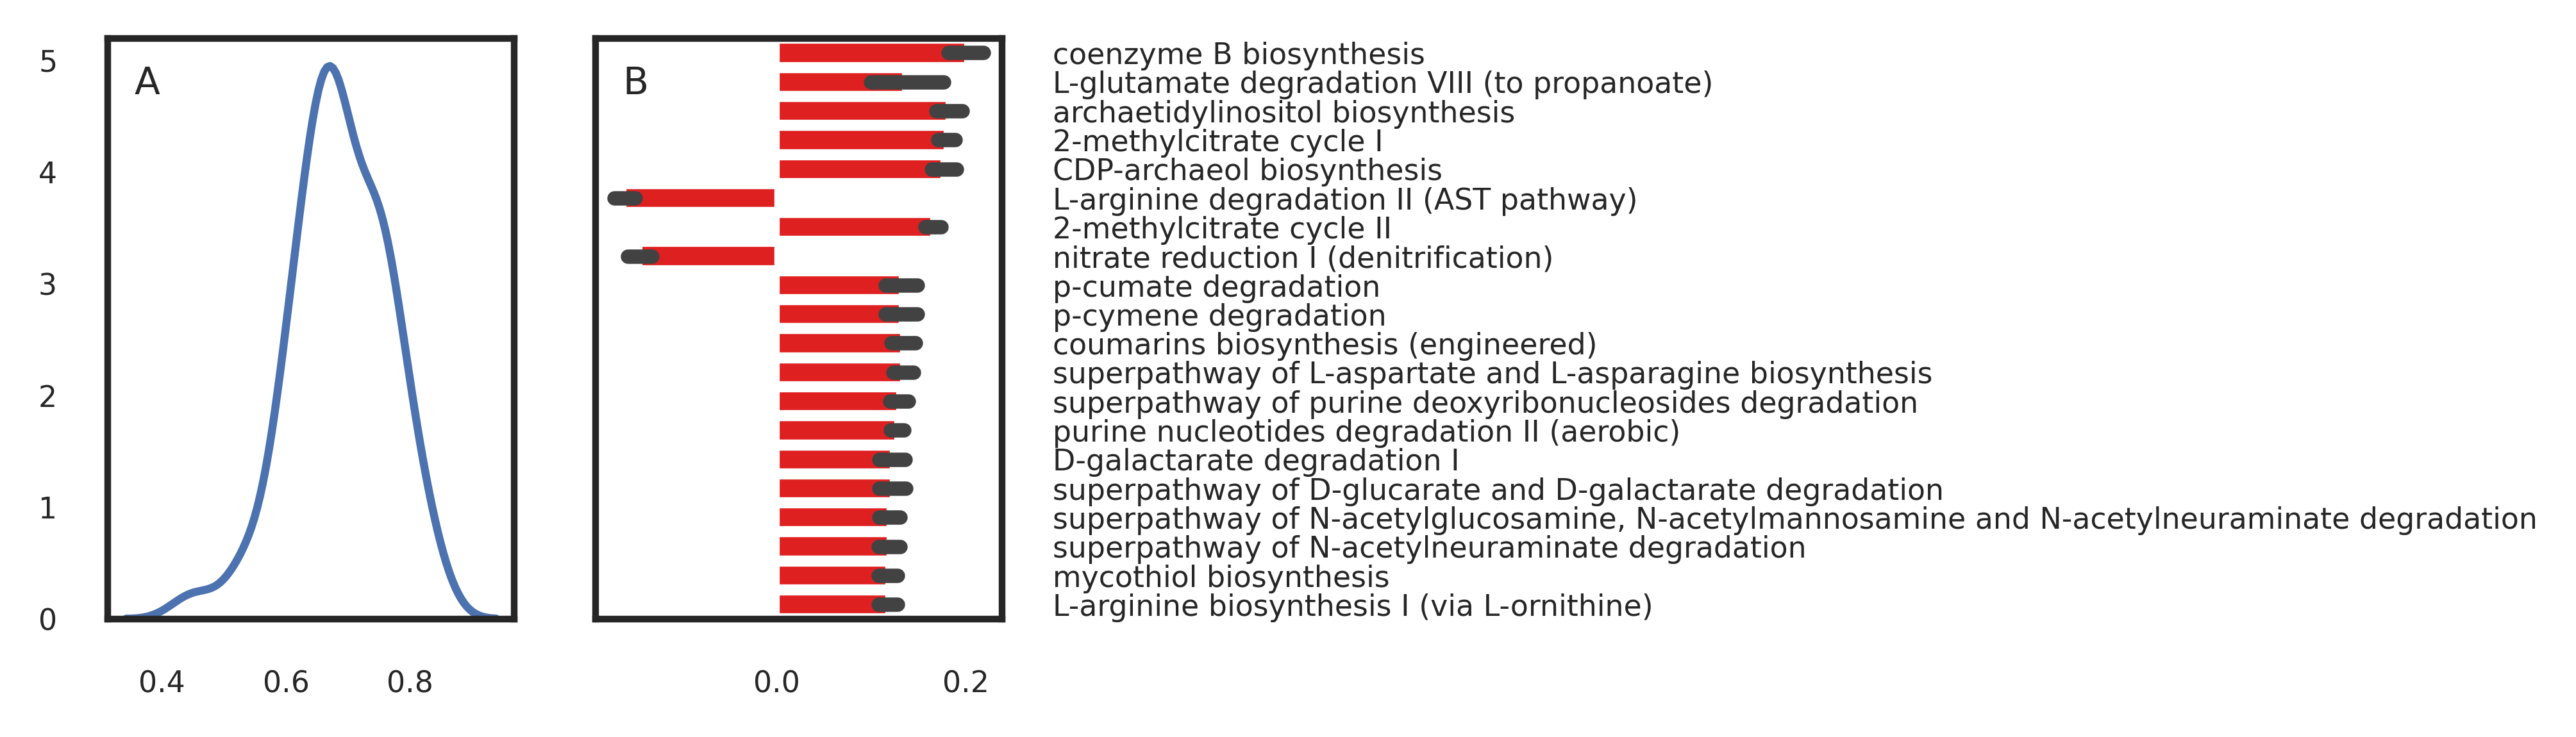

In [548]:
from Bio.KEGG import REST

metadata = pd.read_csv('16SrRNA_metadata.tsv',index_col=0,sep='\t')

fig, axes = plt.subplots(1,2,dpi=600,figsize=(3,2),tight_layout=True)

axinds = [0,1]
ax_labels = ['A','B']

for marker in ['16SrRNA']:
    
    R2 = [float(i.rstrip()) for i in open('picrust/%s/p_regression_coefficients.txt'%marker,'r').readlines()]
    coefficients = pd.read_csv('picrust/%s/p_coefficients.tsv' % marker, sep='\t', index_col=0)
    
    ax = axes[axinds.pop(0)]
    sns.distplot(R2,hist=False,ax=ax)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    
    def get_mean_coef(series):
        return np.average([abs(i) for i in series])
    
    coefficients['Mean'] = coefficients.apply(get_mean_coef,axis=1)  
    coefficients = coefficients.sort_values('Mean',ascending=False).iloc[:20,:].transpose()
    coefficients.drop('Mean')
    
    new_cols = []
    
    gene_table = 'picrust/16SrRNA/outputs/pathways_out/path_abun_unstrat_descrip.tsv.gz'
    descriptions = pd.read_csv(gene_table, index_col=0,sep='\t')
    
    for col in coefficients:
        new_cols.append(descriptions.at[col,'description'])
    
    coefficients.columns = new_cols

    ax = axes[axinds.pop(0)]
    sns.barplot(data=coefficients,ax=ax,orient='h',color='red',estimator=np.average)
    ax.tick_params(labelleft=False, labelright=True)
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=7)
    ax.set_ylabel('')
    
fig.savefig('p_logistic_regression.png',bbox_inches='tight')

In [119]:
!mkdir -p group_significance_alpha/16SrRNA group_significance_alpha/ITS1 

for marker in ['16SrRNA','ITS1']:
    for alpha in ['faith_pd','shannon','observed_features']:

        vector = 'diversity/%s/%s_vector.qza' % (marker,alpha)
        outf = 'group_significance_alpha/%s/%s_results.qzv' % (marker,alpha)
        metadata = '%s_metadata.tsv' % marker

        !qiime diversity alpha-group-significance \
          --i-alpha-diversity $vector \
          --m-metadata-file $metadata \
          --o-visualization $outf

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: group_significance_alpha/16SrRNA/faith_pd_results.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: group_significance_alpha/16SrRNA/shannon_results.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: group_significance_alpha/16SrRNA/observed_features_results.qzv
/home/amir/anaconda3/envs/

In [120]:
for marker in ['16SrRNA','ITS1']:
    for niche in ['shrub','intershrub']:
        d = "group_significance_alpha_%s/%s" % (niche,marker)
        !mkdir -p $d
        for alpha in ['faith_pd','shannon','observed_features']:

            vector = 'diversity_%s/%s/%s_vector.qza' % (niche,marker,alpha)
            outf = 'group_significance_alpha_%s/%s/%s_results.qzv' % (niche,marker,alpha)
            metadata = '%s_metadata.tsv' % marker

            !qiime diversity alpha-group-significance \
              --i-alpha-diversity $vector \
              --m-metadata-file $metadata \
              --o-visualization $outf

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: group_significance_alpha_shrub/16SrRNA/faith_pd_results.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: group_significance_alpha_shrub/16SrRNA/shannon_results.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: group_significance_alpha_shrub/16SrRNA/observed_features_results.qzv
/home/am

In [121]:
!mkdir -p anova/16SrRNA anova/ITS1

for marker in ['16SrRNA','ITS1']:
    qza = 'diversity/%s/faith_pd_vector.qza' % marker
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/alpha-diversity.tsv'
    faithpd = pd.read_csv(inf,index_col=0,sep='\t')
    !rm -r $digest

    metadata = pd.read_csv('%s_metadata.tsv' % marker,sep='\t',index_col=0)
    def get_geo(string):
        return metadata.at[string,'Geodiversity']
    def get_niche(string):
        return str(metadata.at[string,'Niche'])
    def get_part_a(string):
        return str(metadata.at[string,'TubePartA_slope_or_plant'])

    faithpd['Geodiversity'] = faithpd.index.map(get_geo)
    faithpd['Niche'] = faithpd.index.map(get_niche)
    faithpd['Slope'] = faithpd.index.map(get_part_a)
    faithpd.index.name = 'sample-id'
    faithpd.to_csv('anova/%s/faithpd.tsv' % marker,sep='\t')

    table = 'anova/%s/faithpd.tsv' % marker
    qzv = 'anova/%s/faithpd.qzv' % marker
    
    !qiime longitudinal anova \
        --m-metadata-file $table \
        --p-formula "faith_pd ~ Geodiversity + Niche + Slope" \
        --o-visualization $qzv

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/16SrRNA/faithpd.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/ITS1/faithpd.qzv


### Beta diversity test
Within and amnong niches within geodiversity classes

In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

def distance_matrix(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/distance-matrix.tsv'
    matrix = pd.read_csv(inf,sep='\t',index_col=0)
    !rm -r $digest
    return matrix

narrow1  = pd.DataFrame(columns = ['metric','marker','slope','geodiversity','a','b','niche_a','niche_b','withinamong','distance'])

for marker in ['ITS1','16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    metadata = metadata.loc[metadata.Experiment == 'H_VS_O']
    for metric in ['weighted','unweighted']:
        matrix = distance_matrix('diversity/%s/%s_unifrac_distance_matrix.qza' % (marker,metric))
        samples = metadata.index.tolist()
        samples = [i for i in samples if i in matrix.index.tolist()]
        for i in range(len(samples)):
            for j in range(i+1,len(samples)):
                a = samples[i]
                b = samples[j]
                slope_a = metadata.at[a,'TubePartA_slope_or_plant']
                slope_b = metadata.at[b,'TubePartA_slope_or_plant']
                if slope_a != slope_b:
                    continue
                if metadata.at[a,'Geodiversity'] == 'Homogenous':
                    geodiversity = 'Homogeneous'
                else:
                    geodiversity = 'Heterogeneous'
                niche_a = metadata.at[a,'Niche']
                niche_b = metadata.at[b,'Niche']
                within = None
                if niche_a == niche_b:
                    within = 'within %s' % niche_a
                else:
                    within = 'among niches'
                distance = matrix.at[a,b]
                narrow1.loc[len(narrow1)] = [metric,marker,slope_a,geodiversity,a,b,niche_a,niche_b,within,distance]
            
mwu_results = pd.DataFrame(columns = ['metric','marker','geodiversity','u','p'])

for marker in ['16SrRNA','ITS1']:
    for geo in ['Homogeneous','Heterogeneous']:
        for metric in ['weighted','unweighted']:
            withinShrub = narrow1.loc[((narrow1.metric==metric) & (narrow1.marker==marker) & (narrow1.geodiversity==geo) & (narrow1['withinamong'] == 'within Shrub'))]['distance'].tolist()
            withinIntershrub = narrow1.loc[((narrow1.metric==metric) & (narrow1.marker==marker) & (narrow1.geodiversity==geo) & (narrow1['withinamong'] == 'within Intershrub'))]['distance'].tolist()
            among = narrow1.loc[((narrow1.metric==metric) & (narrow1.marker==marker) & (narrow1.geodiversity==geo) & (narrow1['withinamong'] == 'among niches'))]['distance'].tolist()
            u,p=kruskal(withinShrub,withinIntershrub,among)
            mwu_results.loc[len(mwu_results)] = [metric,marker,geo,u,p]
        
mwu_results['q'] = list(multipletests(mwu_results.p, method='fdr_bh'))[1]

In [175]:
mwu_results.to_csv('kruskal_within_and_among_niches_unifrac.tsv',sep='\t')

In [3]:
mwu_results

metric   marker   geodiversity          u         p         q
0    weighted  16SrRNA    Homogeneous  22.476030  0.000013  0.000105
1  unweighted  16SrRNA    Homogeneous   6.518716  0.038413  0.061461
2    weighted  16SrRNA  Heterogeneous  14.063077  0.000884  0.002356
3  unweighted  16SrRNA  Heterogeneous   8.887624  0.011751  0.023502
4    weighted     ITS1    Homogeneous   0.674382  0.713772  0.815740
5  unweighted     ITS1    Homogeneous  14.271087  0.000796  0.002356
6    weighted     ITS1  Heterogeneous   3.082755  0.214086  0.285448
7  unweighted     ITS1  Heterogeneous   0.332469  0.846848  0.846848

In [179]:
for marker in ['16SrRNA','ITS1']:
    for metric in ['weighted','unweighted']:
        narrow1.index.name = 'sample_name'
        narrow1.loc[((narrow1.marker==marker) & (narrow1.metric==metric))].to_csv('anova/%s/%s_within_vs_among_niche.tsv' % (marker,metric),sep='\t')
        table = 'anova/%s/%s_within_vs_among_niche.tsv' % (marker,metric)
        qzv = 'anova/%s/%s_within_vs_among_niche.qzv' % (marker,metric)
        !qiime longitudinal anova \
            --m-metadata-file $table \
            --p-formula "distance ~ withinamong + geodiversity" \
            --o-visualization $qzv

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/16SrRNA/weighted_within_vs_among_niche.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/16SrRNA/unweighted_within_vs_among_niche.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/ITS1/weighted_within_vs_among_niche.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python

### Beta diversity test
Within and among biodiversity classes  
Distances between samples from the same slope were excluded

In [4]:
import pandas as pd
from scipy.stats import mannwhitneyu as mwu
from statsmodels.stats.multitest import multipletests

def distance_matrix(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/distance-matrix.tsv'
    matrix = pd.read_csv(inf,sep='\t',index_col=0)
    !rm -r $digest
    return matrix

narrow2  = pd.DataFrame(columns = ['metric','marker','niche','a','b','slope_a','geodiversity_a','slope_b','geodiversity_b','withinamong','distance'])

for marker in ['ITS1','16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    metadata = metadata.loc[metadata.Experiment == 'H_VS_O']
    for metric in ['weighted','unweighted']:
        matrix = distance_matrix('diversity/%s/%s_unifrac_distance_matrix.qza' % (marker,metric))
        samples = metadata.index.tolist()
        samples = [i for i in samples if i in matrix.index.tolist()]
        for i in range(len(samples)):
            for j in range(i+1,len(samples)):
                a = samples[i]
                b = samples[j]
                slope_a = metadata.at[a,'TubePartA_slope_or_plant']
                slope_b = metadata.at[b,'TubePartA_slope_or_plant']
                niche_a = metadata.at[a,'Niche']
                niche_b = metadata.at[b,'Niche']
                if slope_a == slope_b:
                    continue
                if niche_a != niche_b:
                    continue
                geodiversity_a = metadata.at[a,'Geodiversity']
                geodiversity_b = metadata.at[b,'Geodiversity']
                within = None
                if geodiversity_a == geodiversity_b:
                    within = 'within %s' % metadata.at[a,'Geodiversity']
                else:
                    within = 'among geodiversity'
                distance = matrix.at[a,b]
                narrow2.loc[len(narrow2)] = [metric,marker,niche_a,a,b,slope_a,geodiversity_a,slope_b,geodiversity_b,within,distance]
            
mwu_results = pd.DataFrame(columns = ['metric','marker','niche','u','p'])

for marker in ['16SrRNA','ITS1']:
    for metric in ['weighted','unweighted']:
        for niche in ['Shrub','Intershrub']:
            withinHeterogenous = narrow2.loc[((narrow2.metric==metric) & (narrow2.niche==niche) & (narrow2.marker==marker) & (narrow2['withinamong'] == 'within Heterogenous'))]['distance'].tolist()
            withinHomogenous = narrow2.loc[((narrow2.metric==metric) & (narrow2.niche==niche) & (narrow2.marker==marker) & (narrow2['withinamong'] == 'within Homogenous'))]['distance'].tolist()
            among = narrow2.loc[((narrow2.metric==metric) & (narrow2.niche==niche) & (narrow2.marker==marker) & (narrow2['withinamong'] == 'among geodiversity'))]['distance'].tolist()
            u,p=kruskal(withinHeterogenous,withinHomogenous,among)
            mwu_results.loc[len(mwu_results)] = [metric,marker,niche,u,p]

mwu_results['q'] = list(multipletests(mwu_results.p, method='fdr_bh'))[1]

In [5]:
mwu_results

metric   marker       niche          u         p         q
0    weighted  16SrRNA       Shrub   0.919065  0.631579  0.631579
1    weighted  16SrRNA  Intershrub   1.250141  0.535224  0.611684
2  unweighted  16SrRNA       Shrub   2.454196  0.293142  0.469027
3  unweighted  16SrRNA  Intershrub   8.110826  0.017328  0.034657
4    weighted     ITS1       Shrub  14.417819  0.000740  0.002960
5    weighted     ITS1  Intershrub   2.051255  0.358571  0.478095
6  unweighted     ITS1       Shrub  20.963445  0.000028  0.000224
7  unweighted     ITS1  Intershrub  10.558908  0.005095  0.013587

In [184]:
mwu_results.to_csv('mann_whitney_within_and_among_geodiversity_unifrac.tsv',sep='\t')

In [185]:
for marker in ['16SrRNA','ITS1']:
    for metric in ['weighted','unweighted']:
        narrow2.index.name = 'sample_name'
        narrow2.loc[((narrow2.marker==marker) & (narrow2.metric==metric))].to_csv('anova/%s/%s_within_vs_among_geodiversity.tsv' % (marker,metric),sep='\t')
        table = 'anova/%s/%s_within_vs_among_geodiversity.tsv' % (marker,metric)
        qzv = 'anova/%s/%s_within_vs_among_geodiversity.qzv' % (marker,metric)
        !qiime longitudinal anova \
            --m-metadata-file $table \
            --p-formula "distance ~ withinamong + niche" \
            --o-visualization $qzv

/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/16SrRNA/weighted_within_vs_among_geodiversity.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/16SrRNA/unweighted_within_vs_among_geodiversity.qzv
/home/amir/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt
Saved Visualization to: anova/ITS1/weighted_within_vs_among_geodiversity.qzv
/home/amir/anaconda3/envs/qii

In [6]:
narrow2

metric   marker       niche           a           b slope_a  \
0       weighted     ITS1       Shrub  ITS-AS3000  ITS-AS3010      O1   
1       weighted     ITS1       Shrub  ITS-AS3000  ITS-AS3011      O1   
2       weighted     ITS1       Shrub  ITS-AS3000  ITS-AS3012      O1   
3       weighted     ITS1       Shrub  ITS-AS3000  ITS-AS3013      O1   
4       weighted     ITS1       Shrub  ITS-AS3000  ITS-AS3014      O1   
...          ...      ...         ...         ...         ...     ...   
2285  unweighted  16SrRNA  Intershrub      AS3048      AS3058      H2   
2286  unweighted  16SrRNA  Intershrub      AS3049      AS3055      H2   
2287  unweighted  16SrRNA  Intershrub      AS3049      AS3056      H2   
2288  unweighted  16SrRNA  Intershrub      AS3049      AS3057      H2   
2289  unweighted  16SrRNA  Intershrub      AS3049      AS3058      H2   

     geodiversity_a slope_b geodiversity_b          withinamong  distance  
0        Homogenous      O2     Homogenous    within Homogenous  0.987722  
1        Homogenous      O2     Homogenous    within Homogenous  0.872836  
2        Homogenous      O2     Homogenous    within Homogenous  0.917133  
3        Homogenous      O2     Homogenous    within Homogenous  1.084748  
4        Homogenous      O2     Homogenous    within Homogenous  1.175008  
...             ...     ...            ...                  ...       ...  
2285   Heterogenous      H3   Heterogenous  within Heterogenous  0.543749  
2286   Heterogenous      H3   Heterogenous  within Heterogenous  0.484564  
2287   Heterogenous      H3   Heterogenous  within Heterogenous  0.395637  
2288   Heterogenous      H3   Heterogenous  within Heterogenous  0.460451  
2289   Heterogenous      H3   Heterogenous  within Heterogenous  0.419972  

[2290 rows x 11 columns]

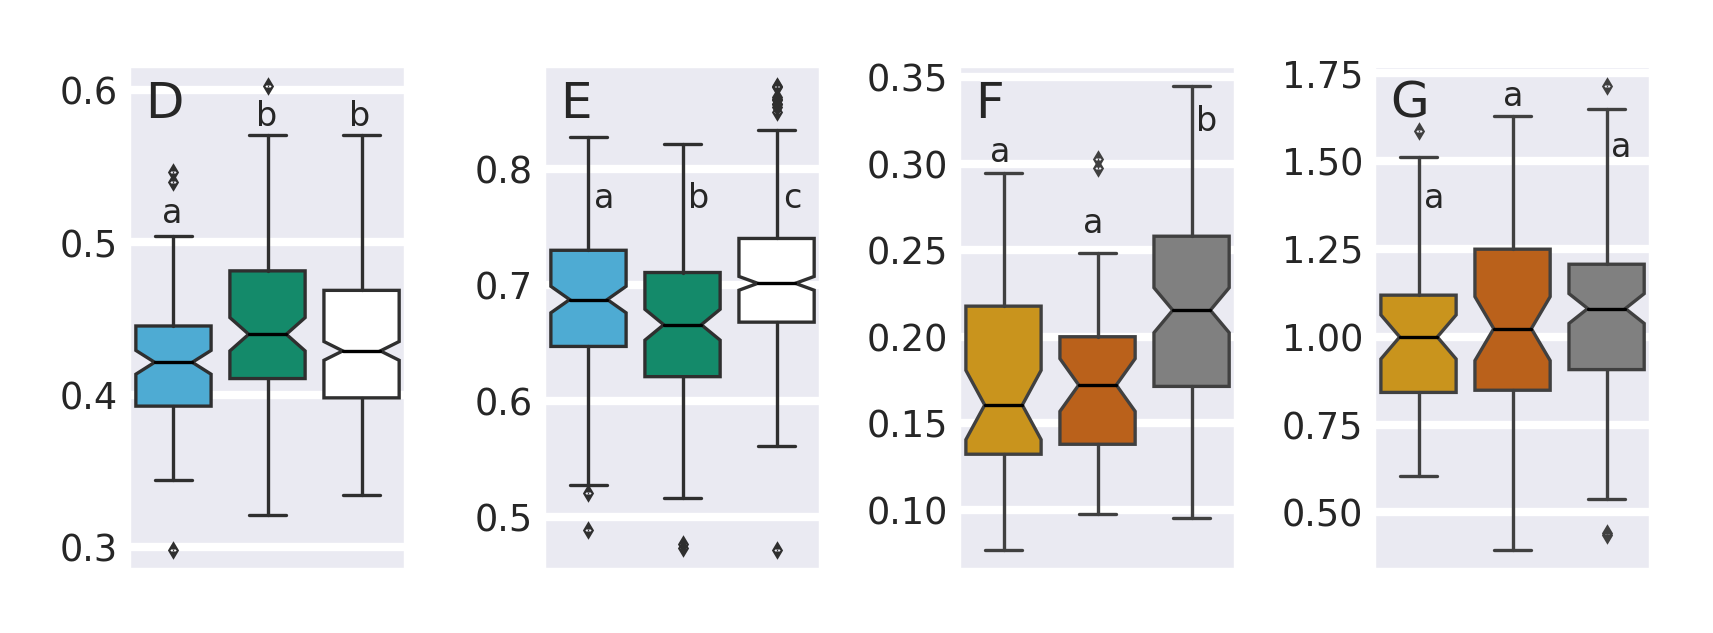

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

narrow1['test'] = 'niches'
narrow2['test'] = 'geodiversity'
sns.set(font_scale=0.4)
fig, axes = plt.subplots(nrows=1,ncols=4,tight_layout=True,dpi=600,figsize=(2.8,1))

axinds = [0,1,2,3]
ax_label = 'D'


for test in ['geodiversity','niches']:
    for marker in ['16SrRNA','ITS1']:
        metric = 'weighted'
        if test == 'geodiversity':
            metric = 'unweighted'
        ax = axes[axinds.pop(0)]
        df = narrow1
        order = ['within Shrub','within Intershrub','among niches']
        color = ['#E69F00','#D55E00','gray']
        swarmcat = 'geodiversity'
        swarmcolors = ['#cc7fa7','#0072b2']
        swarmorder = ['Homogeneous','Heterogeneous']
        swarmmarker = ['s','s']
        hue = 'geodiversity'
        if test == 'geodiversity':
            df = narrow2
            order = ['within Homogenous','within Heterogenous','among geodiversity']
            color = ['#38B4E9','#009E73','white']
            hue = 'niche'
            swarmcat = 'niche'
            swarmorder = ['Shrub','Intershrub']
            swarmcolors = ['darkgray','darkgray']
            swarmmarker = ['o','X']
        df = df.loc[((df.marker==marker)&(df.metric==metric))]
        sns.boxplot(x='withinamong',y='distance',data=df, order=order,ax=ax,palette=color,
                    linewidth=0.4,fliersize=0.2,medianprops={'color':'black'},notch=True)
        #sns.swarmplot(x='withinamong',y='distance',data=df.loc[df[swarmcat]==swarmorder.pop(0)],
        #              order=order,ax=ax,size=1.2,marker=swarmmarker.pop(0),color=swarmcolors.pop(),alpha=0.7)
        #sns.swarmplot(x='withinamong',y='distance',data=df.loc[df[swarmcat]==swarmorder.pop(0)],
        #              order=order,ax=ax,size=1.2,marker=swarmmarker.pop(0),color=swarmcolors.pop(),alpha=0.7)
        ax.set_xticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.yaxis.set_tick_params(pad=-5)
        ax.annotate(ax_label,xy=(-0.08,1.05),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=6)
        if ax_label=='F':
            ax.annotate('a',xy=(-0.03,0.94),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('a',xy=(0.3,0.8),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('b',xy=(0.7,1.0),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
        if ax_label=='G':
            ax.annotate('a',xy=(0.04,0.85),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('a',xy=(0.32,1.05),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('a',xy=(0.7,0.95),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
        if ax_label=='D':
            ax.annotate('a',xy=(-0.02,0.82),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('b',xy=(0.31,1.01),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('b',xy=(0.64,1.01),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            #ax.annotate('^',xy=(0.85,0.12),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=6)
        if ax_label=='E':
            ax.annotate('a',xy=(0.04,0.85),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('b',xy=(0.37,0.85),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
            ax.annotate('c',xy=(0.71,0.85),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=4)
        ax_label = chr(ord(ax_label) + 1) 
            
fig.savefig('unifrac_boxplots_subset.png',bbox_inches='tight')    

### Alpha diversity test
Between niches within biodiversity classes

In [126]:
import pandas as pd
from scipy.stats import mannwhitneyu as mwu
from statsmodels.stats.multitest import multipletests

def faith_pd_vector(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/alpha-diversity.tsv'
    faith_pd_all = pd.read_csv(inf,index_col=0,sep='\t')
    !rm -r $digest
    return faith_pd_all

narrow  = pd.DataFrame(columns = ['marker','slope','sample','geodiversity','niche','faith_pd'])

for marker in ['ITS1','16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    metadata = metadata.loc[metadata.Experiment == 'H_VS_O']
    vector = faith_pd_vector('diversity/%s/faith_pd_vector.qza' % marker)
    samples = metadata.index.tolist()
    samples = [i for i in samples if i in vector.index.tolist()]
    for smpl in samples:
        slope = metadata.at[smpl,'TubePartA_slope_or_plant']
        geodiversity = metadata.at[smpl,'Geodiversity']
        niche = metadata.at[smpl,'Niche']
        faith_pd = vector.at[smpl,'faith_pd']
        narrow.loc[len(narrow)] = [marker,slope,smpl,geodiversity,niche,faith_pd]
            
mwu_results = pd.DataFrame(columns = ['marker','geodiversity','u','p'])

for marker in ['16SrRNA','ITS1']:
    for geo in ['Homogenous','Heterogenous']:
            shrub = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity==geo) & (narrow.niche == 'Shrub'))]['faith_pd'].tolist()
            inter = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity==geo) & (narrow.niche == 'Intershrub'))]['faith_pd'].tolist()
            u,p=mwu(shrub,inter)
            mwu_results.loc[len(mwu_results)] = [marker,geo,u,p]
        
mwu_results['q'] = list(multipletests(mwu_results.p, method='fdr_bh'))[1]

In [119]:
mwu_results.to_csv('mann_whitney_between_niches_faith_pd.tsv',sep='\t')

### Alpha diversity test
Between geodiversity classes

In [128]:
log = open('mann_whitney_between_geodiversity_classes_faith_pd.tsv','wt')
for marker in ['16SrRNA','ITS1']:
    homo = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity=='Homogenous'))]['faith_pd'].tolist()
    hetero = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity=='Heterogenous'))]['faith_pd'].tolist()
    u,p=mwu(homo,hetero)
    print(marker,u,p)
    log.write('%s\t%.7f\t%.7f\n' % (marker,u,p))
log.close()

16SrRNA 148.0 0.00015735332347834063
ITS1 376.0 0.40285679813398884


### Ancom

In [97]:

for marker in ['16SrRNA','ITS1']:
    
    outdir = 'ancom/%s' % marker
    !mkdir -p $outdir
    
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    table_Hetro = 'filtered_tables/%s/filtered_table.hetero.qza' % marker
    table_Homo = 'filtered_tables/%s/filtered_table.homo.qza' % marker
    ancom_H_vs_H = 'ancom/%s/ancom_H_vs_H.qzv' % marker
    ancom_Hetro = 'ancom/%s/ancom_Hetro.qzv' % marker
    ancom_Homo = 'ancom/%s/ancom_Homo.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker

    !qiime taxa collapse \
      --i-table $table_H_vs_H \
      --i-taxonomy $taxonomy \
      --p-level 6 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Geodiversity \
      --o-visualization $ancom_H_vs_H
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Hetro \
      --i-taxonomy $taxonomy \
      --p-level 6 \
      --o-collapsed-table temp.qza
    
    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Hetro
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Homo \
      --i-taxonomy $taxonomy \
      --p-level 6 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Homo
    
    !rm temp.qza

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/16SrRNA/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/16SrRNA/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/16SrRNA/ancom_Homo.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/ITS1/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/ITS1/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/ITS1/ancom_Homo.qzv


In [96]:

for marker in ['16SrRNA','ITS1']:
    
    outdir = 'ancom_l4/%s' % marker
    !mkdir -p $outdir
    
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    table_Hetro = 'filtered_tables/%s/filtered_table.hetero.qza' % marker
    table_Homo = 'filtered_tables/%s/filtered_table.homo.qza' % marker
    ancom_H_vs_H = 'ancom_l4/%s/ancom_H_vs_H.qzv' % marker
    ancom_Hetro = 'ancom_l4/%s/ancom_Hetro.qzv' % marker
    ancom_Homo = 'ancom_l4/%s/ancom_Homo.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker

    !qiime taxa collapse \
      --i-table $table_H_vs_H \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Geodiversity \
      --o-visualization $ancom_H_vs_H
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Hetro \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table temp.qza
    
    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Hetro
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Homo \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Homo
    
    !rm temp.qza

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/16SrRNA/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/16SrRNA/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/16SrRNA/ancom_Homo.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/ITS1/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/ITS1/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/ITS1/ancom_Homo.qzv


In [73]:
for marker in ['16SrRNA','ITS1']:
    
    outdir = 'ancom_asvs/%s' % marker
    !mkdir -p $outdir
    
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    table_Hetro = 'filtered_tables/%s/filtered_table.hetero.qza' % marker
    table_Homo = 'filtered_tables/%s/filtered_table.homo.qza' % marker
    ancom_H_vs_H = 'ancom_asvs/%s/ancom_H_vs_H.qzv' % marker
    ancom_Hetro = 'ancom_asvs/%s/ancom_Hetro.qzv' % marker
    ancom_Homo = 'ancom_asvs/%s/ancom_Homo.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker

    !qiime composition add-pseudocount \
      --i-table $table_H_vs_H \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Geodiversity \
      --o-visualization $ancom_H_vs_H
    
    !rm temp.qza

    !qiime composition add-pseudocount \
      --i-table $table_Hetro \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Hetro
    
    !rm temp.qza

    !qiime composition add-pseudocount \
      --i-table $table_Homo \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Homo
    
    !rm temp.qza

Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/16SrRNA/ancom_H_vs_H.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/16SrRNA/ancom_Hetro.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/16SrRNA/ancom_Homo.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/ITS1/ancom_H_vs_H.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/ITS1/ancom_Hetro.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/ITS1/ancom_Homo.qzv


In [119]:


for marker in ['16SrRNA','ITS1']:
    ouf = 'ancom_slops/%s' % marker
    !mkdir -p $ouf
    metadata = "%s_metadata.tsv" % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker
    m = pd.read_csv(metadata,sep='\t',index_col=0)
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    
    for slope in set(m.TubePartA_slope_or_plant):
        
        if len(m.loc[m.TubePartA_slope_or_plant==slope].index) < 8:
            continue
            
        ancom = 'ancom_slops/%s/ancom_%s.qzv' % (marker,slope)
        
        cline = 'qiime feature-table filter-samples '
        cline += '--i-table %s --m-metadata-file %s '
        cline += '--p-where "[TubePartA_slope_or_plant]=\'%s\'" '
        cline += '--o-filtered-table temp.qza' 
        cline = cline% (table_H_vs_H,metadata,slope)
        
        p = Popen(cline, shell=True,stdout=PIPE,stderr=PIPE)
        out, err = p.communicate()

        !qiime taxa collapse \
          --i-table temp.qza \
          --i-taxonomy $taxonomy \
          --p-level 6 \
          --o-collapsed-table temp.qza

        !qiime composition add-pseudocount \
          --i-table temp.qza \
          --o-composition-table temp.qza

        !qiime composition ancom \
          --i-table temp.qza \
          --m-metadata-file $metadata \
          --m-metadata-column Niche \
          --o-visualization $ancom

        !rm temp.qza
        
        

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_O2.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_H2.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_O3.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_H3.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_O1.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_H1.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/ITS1/a

In [77]:
import pandas as pd

!mkdir picrust/diversity

for marker in ['16SrRNA','ITS1']:
    
    pathways = 'picrust/%s/output/pathways_out/path_abun_unstrat.tsv.gz' % marker
    pathways_biom =  'picrust/%s/output/pathways_out/path_abun_unstrat.biom' % marker
    pathways_qza =  'picrust/%s/output/pathways_out/path_abun_unstrat.qza' % marker
    metadata = "%s_metadata.tsv" % marker
    outdir = 'picrust/diversity/%s' % marker
    rare_tab = 'picrust/diversity/%s/rarefied_table.qza' % marker
    bc_pcoa = 'picrust/diversity/%s/bray_curtis_pcoa_results.qza' % marker
    bc_biplot = 'picrust/diversity/%s/bray_curtis_biplot_results.qza' % marker
    j_pcoa = 'picrust/diversity/%s/jaccard_pcoa_results.qza' % marker
    j_biplot = 'picrust/diversity/%s/jaccard_biplot_results.qza' % marker
    
    !biom convert \
        -i $pathways \
        -o $pathways_biom \
        --table-type="OTU table" \
        --to-hdf5
    
    !qiime tools import \
      --input-path $pathways_biom \
      --type 'FeatureTable[Frequency]' \
      --input-format BIOMV210Format \
      --output-path $pathways_qza
    
    !qiime diversity core-metrics \
      --i-table $pathways_qza \
      --p-sampling-depth 2000 \
      --m-metadata-file $metadata \
      --output-dir $outdir

    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $bc_pcoa \
      --i-features temp.qza \
      --o-biplot $bc_biplot

    !rm temp.qza
    
    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $j_pcoa \
      --i-features temp.qza \
      --o-biplot $j_biplot

!rm temp.qza

Imported picrust/16SrRNA/output/pathways_out/path_abun_unstrat.biom as BIOMV210Format to picrust/16SrRNA/output/pathways_out/path_abun_unstrat.qza
Saved FeatureTable[Frequency] to: picrust/diversity/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/jaccard_pcoa_results.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/bray_curtis_pcoa_results.qza
Saved Visualization to: picrust/diversity/16SrRNA/jaccard_emperor.qzv
Saved Visualization to: picrust/diversity/16SrRNA/bray_curtis_emperor.qzv
Saved FeatureTable[RelativeFrequency] to: temp.qza
Saved PCoAResu

/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:149: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


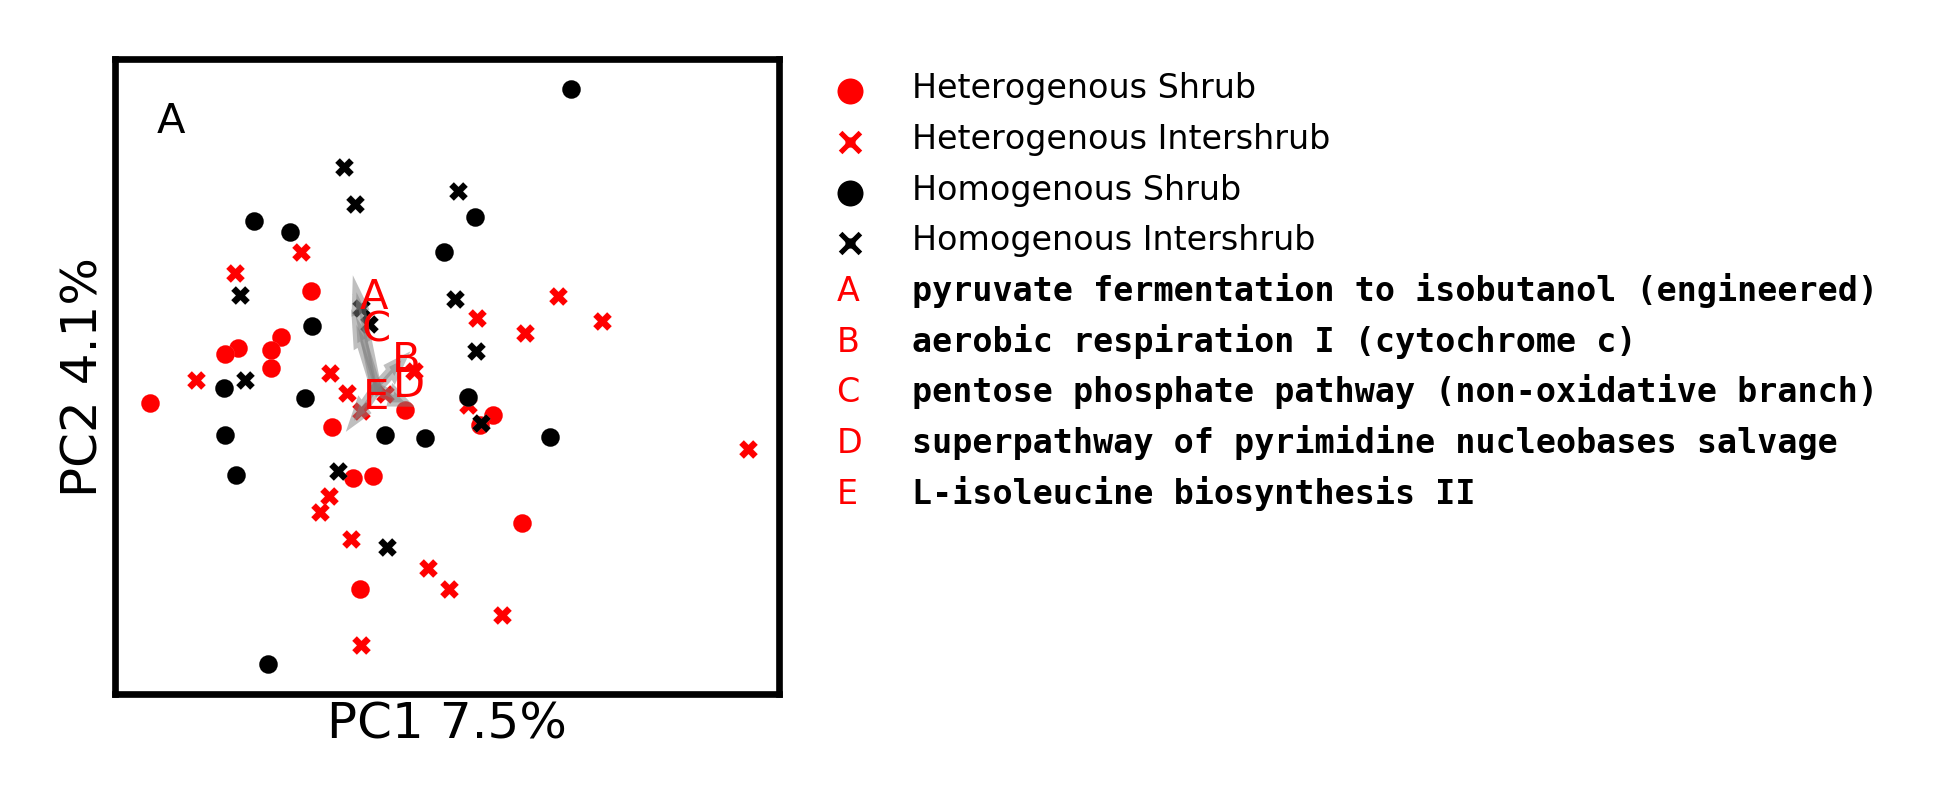

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.spatial.distance import euclidean
%matplotlib inline

def parse_biplot(qza): ### Unzipping qza biplots
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_csv(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None, sep='\t')
    biplot = pd.read_csv(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None, sep='\t')
    nan_cols = []
    for col in biplot:
        if np.isnan(biplot[col].tolist()[0]):
            nan_cols.append(col)
    if len(nan_cols) > 0:
        biplot = biplot.drop(labels=nan_cols,axis=1)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords(axis,axis2,num,biplot): ### Geting coordinats for arrows
    arrow_data = []
    origin = np.zeros_like(biplot.columns)
    biplot['importance'] = biplot.apply(euclidean, axis=1, args=(origin,))
    biplot.sort_values('importance', inplace=True, ascending=False)
    for taxon in biplot.index.tolist()[:num].copy():
        arrow_data.append([taxon,biplot.at[taxon,axis],biplot.at[taxon,axis2]])
    return arrow_data


colora = {
    'Heterogenous': 'red',
    'Homogenous': 'black',
}

marka = {
    'Shrub': 'o',
    'Intershrub': 'X'
}

def sub(ordination,metadata,ax):
    for geo in set(metadata.Geodiversity):
        for niche in set(metadata.Niche):
            color = colora[geo]
            marker = marka[niche]
            size = 5
            data = ordination.loc[
                ordination.index.isin(metadata.loc[
                    ((metadata.Niche == niche) & (metadata.Geodiversity == geo))
                ].index)
            ]
            sns.scatterplot(x=x,y=y,
                            data=data,
                            ax=ax,
                            legend=False,
                            color=color,
                            marker=marker,
                            s=size,
                            linewidth=0.01)


z=5 ### Number of features to plot

fig=plt.figure(constrained_layout=True,dpi=600,figsize=(2,1.4))
fig.set_constrained_layout_pads(w_pad=0, h_pad=0)
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.1)
axes = []
for ax in gs:
    axes.append(fig.add_subplot(ax))
    
j=0

letter = 'a'
ax_labels = ['A','B']

for marker in ['16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, sep='\t', index_col=0)
    for unifrac in ['bray_curtis']:
        qza = 'picrust/diversity/%s/%s_biplot_results.qza' % (marker,unifrac)
        ordination, biplot, Eigvals, Proportion = parse_biplot(qza)
        descriptions = pd.read_csv('picrust/%s/output/pathways_out/path_abun_unstrat_descrip.tsv.gz' % marker,index_col=0,sep='\t')
        x=1 ### axis to show
        y=2 ### axis to show
        ax = axes[j]
        j+=1
        sub(ordination,metadata,ax)
        
        ylim = ax.get_ylim()

        arrow_data = get_arrow_coords(x,y,z,biplot)
        arrow_labels_legend = {}

        
        for arrow in arrow_data:
            arrow_x,text_x = arrow[1],arrow[1]
            arrow_y, text_y = arrow[2], arrow[2]
            if arrow[2] > ylim[1]:
                arrow_y, text_y = ylim[1]-0.01, ylim[1]-0.01
            ax.arrow(0, 0, arrow_x, arrow_y, fc='gray',ec='gray',alpha=0.5)
            arrow_labels_legend[letter.upper()] = descriptions.at[arrow[0],'description']
            ax.text(text_x, text_y, letter.upper(), fontdict={'fontsize': 5, 'color':'red'})
            letter = chr(ord(letter) + 1)

        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[y-1]*100.0),fontdict={'fontsize': 6})
        ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[x-1]*100.0),fontdict={'fontsize': 6})
        ax.xaxis.set_label_coords(0.5, -0.01)
        ax.yaxis.set_label_coords(-0.01, 0.5)
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=5)
        #ax.set_xlim(-0.225,0.21)

        ax = axes[j]
        j+=1
        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(0,1)
        ax.set_xlim(0,0.25)

        legend = sorted(list(arrow_labels_legend.items()))
        y = 0.95
        for c in colora:
            if marker=='ITS1':
                continue
            for m in marka:
                sns.scatterplot([0.03],[y],marker=marka[m],color=colora[c],ax=ax,s=15,legend=False)
                ax.text(0.1,y-0.01,"%s %s" % (c,m),fontdict={'size':4})
                y -= 0.08
        for i in legend:
            ax.text(0.015,y-0.01,i[0],fontdict={'size':4,'color':'red'})
            asv = i[1]
            ax.text(0.1,y-0.01,asv,fontdict={'size':4,'family':'monospace','weight':'semibold'})
            y -= 0.08

        for a in ['top','bottom','left','right']:
            ax.spines[a].set_visible(False)
plt.savefig('PCoA_pathways.png')

In [92]:
import pandas as pd

!mkdir picrust/diversity

for marker in ['16SrRNA']:
    
    pathways = 'picrust/%s/output/EC_metagenome_out/pred_metagenome_unstrat.tsv.gz' % marker
    pathways_biom =  'picrust/%s/output/EC_metagenome_out/pred_metagenome_unstrat.biom' % marker
    pathways_qza =  'picrust/%s/output/EC_metagenome_out/pred_metagenome_unstrat.qza' % marker
    metadata = "%s_metadata.tsv" % marker
    outdir = 'picrust/diversity/%s' % marker
    rare_tab = 'picrust/diversity/%s/rarefied_table.qza' % marker
    bc_pcoa = 'picrust/diversity/%s/bray_curtis_pcoa_results.qza' % marker
    bc_biplot = 'picrust/diversity/%s/bray_curtis_biplot_results.qza' % marker
    j_pcoa = 'picrust/diversity/%s/jaccard_pcoa_results.qza' % marker
    j_biplot = 'picrust/diversity/%s/jaccard_biplot_results.qza' % marker
    
    !biom convert \
        -i $pathways \
        -o $pathways_biom \
        --table-type="OTU table" \
        --to-hdf5
    
    !qiime tools import \
      --input-path $pathways_biom \
      --type 'FeatureTable[Frequency]' \
      --input-format BIOMV210Format \
      --output-path $pathways_qza
    
    !qiime diversity core-metrics \
      --i-table $pathways_qza \
      --p-sampling-depth 2000 \
      --m-metadata-file $metadata \
      --output-dir $outdir

    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $bc_pcoa \
      --i-features temp.qza \
      --o-biplot $bc_biplot

    !rm temp.qza
    
    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $j_pcoa \
      --i-features temp.qza \
      --o-biplot $j_biplot

!rm temp.qza

Imported picrust/16SrRNA/output/EC_metagenome_out/pred_metagenome_unstrat.biom as BIOMV210Format to picrust/16SrRNA/output/EC_metagenome_out/pred_metagenome_unstrat.qza
Saved FeatureTable[Frequency] to: picrust/diversity/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/jaccard_pcoa_results.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/bray_curtis_pcoa_results.qza
Saved Visualization to: picrust/diversity/16SrRNA/jaccard_emperor.qzv
Saved Visualization to: picrust/diversity/16SrRNA/bray_curtis_emperor.qzv
Saved FeatureTable[RelativeFrequency] to: t

/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:148: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


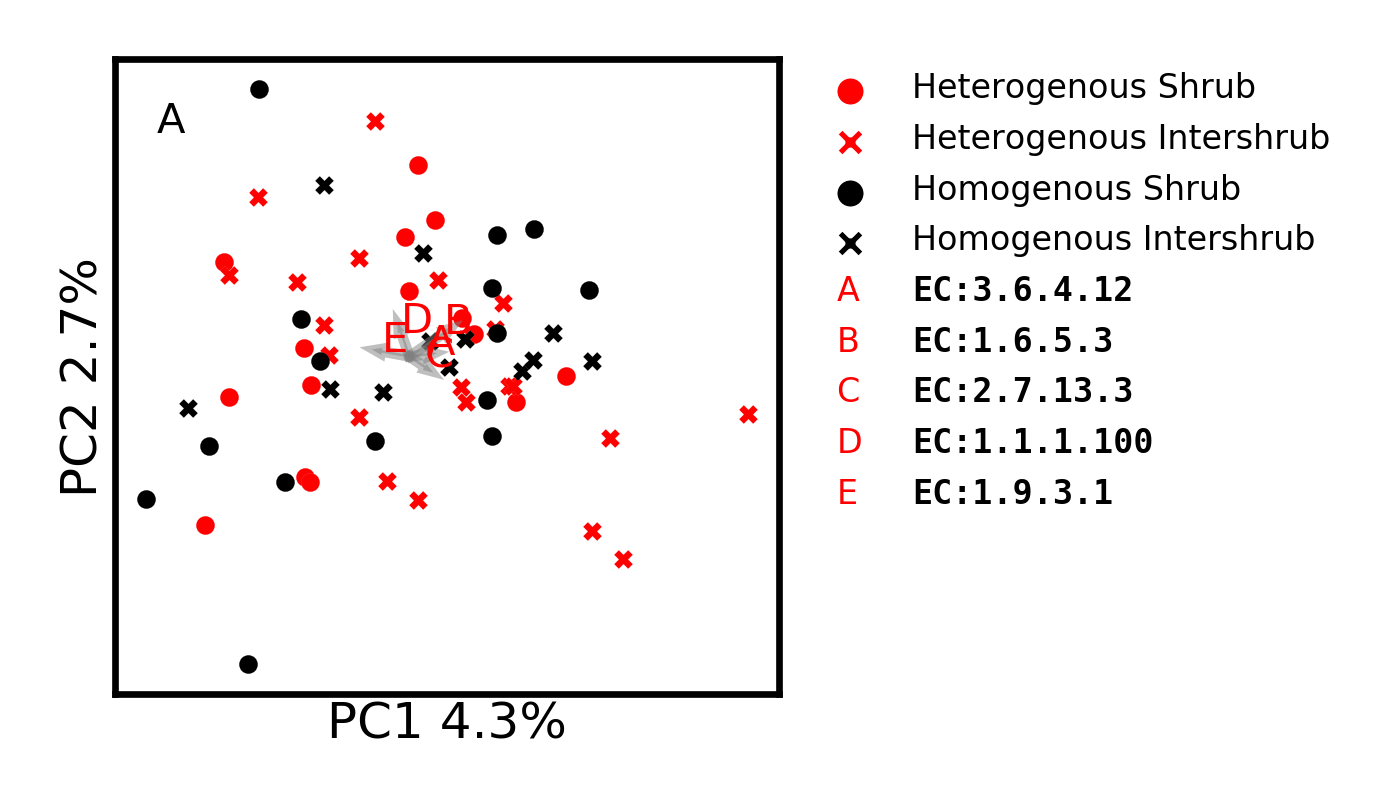

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.spatial.distance import euclidean
%matplotlib inline

def parse_biplot(qza): ### Unzipping qza biplots
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_csv(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None, sep='\t')
    biplot = pd.read_csv(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None, sep='\t')
    nan_cols = []
    for col in biplot:
        if np.isnan(biplot[col].tolist()[0]):
            nan_cols.append(col)
    if len(nan_cols) > 0:
        biplot = biplot.drop(labels=nan_cols,axis=1)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords(axis,axis2,num,biplot): ### Geting coordinats for arrows
    arrow_data = []
    origin = np.zeros_like(biplot.columns)
    biplot['importance'] = biplot.apply(euclidean, axis=1, args=(origin,))
    biplot.sort_values('importance', inplace=True, ascending=False)
    for taxon in biplot.index.tolist()[:num].copy():
        arrow_data.append([taxon,biplot.at[taxon,axis],biplot.at[taxon,axis2]])
    return arrow_data


colora = {
    'Heterogenous': 'red',
    'Homogenous': 'black',
}

marka = {
    'Shrub': 'o',
    'Intershrub': 'X'
}

def sub(ordination,metadata,ax):
    for geo in set(metadata.Geodiversity):
        for niche in set(metadata.Niche):
            color = colora[geo]
            marker = marka[niche]
            size = 5
            data = ordination.loc[
                ordination.index.isin(metadata.loc[
                    ((metadata.Niche == niche) & (metadata.Geodiversity == geo))
                ].index)
            ]
            sns.scatterplot(x=x,y=y,
                            data=data,
                            ax=ax,
                            legend=False,
                            color=color,
                            marker=marker,
                            s=size,
                            linewidth=0.01)


z=5 ### Number of features to plot

fig=plt.figure(constrained_layout=True,dpi=600,figsize=(2,1.4))
fig.set_constrained_layout_pads(w_pad=0, h_pad=0)
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.1)
axes = []
for ax in gs:
    axes.append(fig.add_subplot(ax))
    
j=0

letter = 'a'
ax_labels = ['A','B']

for marker in ['16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, sep='\t', index_col=0)
    for unifrac in ['bray_curtis']:
        qza = 'picrust/diversity/%s/%s_biplot_results.qza' % (marker,unifrac)
        ordination, biplot, Eigvals, Proportion = parse_biplot(qza)
        x=1 ### axis to show
        y=2 ### axis to show
        ax = axes[j]
        j+=1
        sub(ordination,metadata,ax)
        
        ylim = ax.get_ylim()

        arrow_data = get_arrow_coords(x,y,z,biplot)
        arrow_labels_legend = {}

        
        for arrow in arrow_data:
            arrow_x,text_x = arrow[1],arrow[1]
            arrow_y, text_y = arrow[2], arrow[2]
            if arrow[2] > ylim[1]:
                arrow_y, text_y = ylim[1]-0.01, ylim[1]-0.01
            ax.arrow(0, 0, arrow_x, arrow_y, fc='gray',ec='gray',alpha=0.5)
            arrow_labels_legend[letter.upper()] = arrow[0]
            ax.text(text_x, text_y, letter.upper(), fontdict={'fontsize': 5, 'color':'red'})
            letter = chr(ord(letter) + 1)

        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[y-1]*100.0),fontdict={'fontsize': 6})
        ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[x-1]*100.0),fontdict={'fontsize': 6})
        ax.xaxis.set_label_coords(0.5, -0.01)
        ax.yaxis.set_label_coords(-0.01, 0.5)
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=5)
        #ax.set_xlim(-0.225,0.21)

        ax = axes[j]
        j+=1
        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(0,1)
        ax.set_xlim(0,0.25)

        legend = sorted(list(arrow_labels_legend.items()))
        y = 0.95
        for c in colora:
            if marker=='ITS1':
                continue
            for m in marka:
                sns.scatterplot([0.03],[y],marker=marka[m],color=colora[c],ax=ax,s=15,legend=False)
                ax.text(0.1,y-0.01,"%s %s" % (c,m),fontdict={'size':4})
                y -= 0.08
        for i in legend:
            ax.text(0.015,y-0.01,i[0],fontdict={'size':4,'color':'red'})
            asv = i[1]
            ax.text(0.1,y-0.01,asv,fontdict={'size':4,'family':'monospace','weight':'semibold'})
            y -= 0.08

        for a in ['top','bottom','left','right']:
            ax.spines[a].set_visible(False)
plt.savefig('PCoA_KO.png')